# PROCESAMIENTO DE DATOS

## CARGANDO LIBRERIAS

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

## Cargando archivos

In [2]:
file01 = pd.read_csv("./data/04_05_2018.csv",sep=";")
file02 = pd.read_csv("./data/05_05_2018.csv",sep=";")
#print("\nPrimera tabla 04-05-2018")
#display(file01.head(5))
#display(file01.tail(5))
#print("\nPrimera tabla 05-05-2018")
#display(file02.head(5))
#display(file02.tail(5))

## Lista de paraderos excluidos


In [3]:
paraderos_excluidos={'Ramon Castilla','Tacna','Jiron de la Unión','Colmena'}
print(paraderos_excluidos)

{'Jiron de la Unión', 'Ramon Castilla', 'Colmena', 'Tacna'}


## Lista de paraderos permitidos


In [4]:
paraderos=[]

pp=list(set(file01['PARADA']) | set(file01['PARADA_F']))
for e in pp:
    if(e not in paraderos_excluidos):
        paraderos.append(e)

print(paraderos)
print("Numero de paraderos totales: ",len(paraderos))

['Ricardo Palma', 'Matellini', 'Balta', 'Parque del Trabajo', 'Aramburu', 'Union', 'México', 'Javier Prado', 'Terán', 'Izaguirre', 'Uni', 'Canaval y Moreyra', 'Plaza de Flores', 'Rosario de Villa', '2 de Mayo', 'Escuela Militar', 'Estadio Nacional', 'Estacion Central', 'Angamos', 'El Milagro', 'Independencia', 'Caqueta', 'Benavides', 'Los jazmines', 'Pacifico', '28 de Julio', 'España', 'Bulevar', 'Naranjal', 'Quilca', 'Tomas Valle', 'Canadá', 'Honorio Delgado', 'Domingo Orué']
Numero de paraderos totales:  34


In [5]:
paraderos_sort=list(['Naranjal',
                'Izaguirre',
                'Pacifico',
                'Independencia',
                'Los jazmines',
                'Tomas Valle',
                'El Milagro',
                'Honorio Delgado',
                'Uni',
                'Parque del Trabajo',
                'Caqueta',
                '2 de Mayo',
                'Quilca',
                'España',
                'Estacion Central',
                'Estadio Nacional',
                'México',
                'Canadá',
                'Javier Prado',
                'Canaval y Moreyra',
                'Aramburu',
                'Domingo Orué',
                'Angamos',
                'Ricardo Palma',
                'Benavides',
                '28 de Julio',
                'Plaza de Flores',
                'Balta',
                'Bulevar',
                'Union',
                'Escuela Militar',
                'Terán',
                'Rosario de Villa',
                'Matellini'
          ])
print(paraderos_sort)
print("Numero de paraderos permitidos ordenados",len(paraderos_sort))

['Naranjal', 'Izaguirre', 'Pacifico', 'Independencia', 'Los jazmines', 'Tomas Valle', 'El Milagro', 'Honorio Delgado', 'Uni', 'Parque del Trabajo', 'Caqueta', '2 de Mayo', 'Quilca', 'España', 'Estacion Central', 'Estadio Nacional', 'México', 'Canadá', 'Javier Prado', 'Canaval y Moreyra', 'Aramburu', 'Domingo Orué', 'Angamos', 'Ricardo Palma', 'Benavides', '28 de Julio', 'Plaza de Flores', 'Balta', 'Bulevar', 'Union', 'Escuela Militar', 'Terán', 'Rosario de Villa', 'Matellini']
Numero de paraderos permitidos ordenados 34


## Formateando las horas a su formato *time*

In [6]:
hora_formateado=[]
for i in range(len(file01)):
    #new_horas_format.append(dt.datetime.strptime("2018-05-04 "+file01['HORA'][i],'%Y-%m-%d %H:%M:%S'))
    hora_formateado.append(dt.datetime.strptime(file01['HORA'][i],'%H:%M:%S').time())
display(hora_formateado[:5])

[datetime.time(4, 46, 5),
 datetime.time(4, 46, 19),
 datetime.time(4, 47, 3),
 datetime.time(4, 47, 16),
 datetime.time(4, 47, 27)]

## Agregando el tiempo en formato time al DataFrame

In [7]:
df_01 = file01.copy()
df_01['HORAS_FORMATO'] = hora_formateado
display(df_01[:5])

,FECHA,HORA,TARJETA,PARADA,PARADA_F,HORAS_FORMATO
0,04/05/2018 0:00,4:46:05,3245985133,Izaguirre,Balta,04:46:05
1,04/05/2018 0:00,4:46:19,1421761268,Izaguirre,28 de Julio,04:46:19
2,04/05/2018 0:00,4:47:03,2931031987,Matellini,Parque del Trabajo,04:47:03
3,04/05/2018 0:00,4:47:16,1623081923,Matellini,Ramon Castilla,04:47:16
4,04/05/2018 0:00,4:47:27,858178313,Matellini,España,04:47:27


## Generando el nuevo *DataFrame*


In [8]:
df_01=df_01[['HORAS_FORMATO','TARJETA', 'PARADA','PARADA_F']]
df_01.head()

,HORAS_FORMATO,TARJETA,PARADA,PARADA_F
0,04:46:05,3245985133,Izaguirre,Balta
1,04:46:19,1421761268,Izaguirre,28 de Julio
2,04:47:03,2931031987,Matellini,Parque del Trabajo
3,04:47:16,1623081923,Matellini,Ramon Castilla
4,04:47:27,858178313,Matellini,España


## Limpiando dataframe  de las rutas excluidas

In [10]:
eliminar_data=[]

#tarjeta_paraderoPermitido = (data_tabla01['PARADA_F'][i] not in paraderos_excluidos) and (data_tabla01['PARADA_F'][i] not in paraderos_excluidos)
#print(tar)
for i in range(len(df_01)):
    if(i>70 and i<90):
        #print((data_tabla01['PARADA_F'][i] not in paraderos_excluidos) and (data_tabla01['PARADA_F'][i] not in paraderos_excluidos)," -> ",data_tabla01['PARADA'][i],"---",data_tabla01['PARADA_F'][i])
        print("i->",i," -->",(df_01['PARADA'][i] in paraderos_excluidos) or (df_01['PARADA_F'][i] in paraderos_excluidos)," -> ",df_01['PARADA'][i],"---",df_01['PARADA_F'][i])
    if((df_01['PARADA'][i] in paraderos_excluidos) or (df_01['PARADA_F'][i] in paraderos_excluidos)):
        eliminar_data.append(i)

print("Cantidad de valores sin eliminar: ", len(df_01))
print("Cantidad de valores a eliminar: ",len(eliminar_data))
print("DEben quedar: df_01 - eliminar_data:", len(df_01)-len(eliminar_data))

i-> 71  --> False  ->  Naranjal --- Canaval y Moreyra
i-> 72  --> False  ->  Naranjal --- Benavides
i-> 73  --> False  ->  Naranjal --- Javier Prado
i-> 74  --> False  ->  Naranjal --- Benavides
i-> 75  --> False  ->  Naranjal --- Escuela Militar
i-> 76  --> False  ->  Naranjal --- Benavides
i-> 77  --> False  ->  Naranjal --- Matellini
i-> 78  --> False  ->  Naranjal --- Canaval y Moreyra
i-> 79  --> False  ->  Naranjal --- Terán
i-> 80  --> False  ->  Naranjal --- Canaval y Moreyra
i-> 81  --> True  ->  Naranjal --- Colmena
i-> 82  --> False  ->  Naranjal --- 28 de Julio
i-> 83  --> False  ->  Naranjal --- Canadá
i-> 84  --> False  ->  Naranjal --- Rosario de Villa
i-> 85  --> False  ->  Naranjal --- Javier Prado
i-> 86  --> False  ->  Naranjal --- Canaval y Moreyra
i-> 87  --> False  ->  Tomas Valle --- Estacion Central
i-> 88  --> False  ->  Tomas Valle --- Javier Prado
i-> 89  --> False  ->  Matellini --- Naranjal
Cantidad de valores sin eliminar:  304705
Cantidad de valores a eli

In [11]:
print()
print(eliminar_data[:100])


[3, 5, 6, 81, 183, 204, 208, 221, 230, 232, 233, 234, 239, 240, 243, 245, 247, 256, 257, 276, 278, 282, 290, 292, 305, 307, 313, 316, 317, 319, 329, 364, 387, 402, 468, 494, 502, 525, 560, 610, 619, 632, 647, 653, 677, 680, 688, 698, 729, 745, 766, 848, 850, 854, 865, 866, 867, 870, 871, 873, 891, 896, 904, 914, 919, 922, 923, 937, 955, 1000, 1001, 1038, 1048, 1049, 1056, 1070, 1074, 1075, 1077, 1078, 1084, 1089, 1099, 1107, 1110, 1145, 1146, 1171, 1175, 1211, 1229, 1242, 1258, 1270, 1303, 1411, 1438, 1455, 1493, 1527]


In [12]:
print("#PARADA_f=->",len(df_01[df_01['PARADA']=='Colmena']))

display(df_01[df_01['PARADA_F']=='Colmena'])

#PARADA_f=-> 6147


,HORAS_FORMATO,TARJETA,PARADA,PARADA_F
81,04:50:22,3236252701,Naranjal,Colmena
256,05:00:14,977711277,Tomas Valle,Colmena
494,05:09:02,1926410745,Naranjal,Colmena
848,05:15:26,925684893,Bulevar,Colmena
850,05:15:26,3988084307,Uni,Colmena
867,05:15:41,3976377667,Naranjal,Colmena
1049,05:18:44,3239094595,Pacifico,Colmena
1110,05:20:04,925999085,Naranjal,Colmena
1146,05:20:46,1876476864,Honorio Delgado,Colmena
1258,05:22:55,925625741,Naranjal,Colmena


In [13]:
display(df_01[:5])
data_01=df_01.drop(eliminar_data)
data_01.reset_index(drop=True,inplace=True)

display(data_01[:41])
print("Elementos finales: ",len(data_01))

,HORAS_FORMATO,TARJETA,PARADA,PARADA_F
0,04:46:05,3245985133,Izaguirre,Balta
1,04:46:19,1421761268,Izaguirre,28 de Julio
2,04:47:03,2931031987,Matellini,Parque del Trabajo
3,04:47:16,1623081923,Matellini,Ramon Castilla
4,04:47:27,858178313,Matellini,España


,HORAS_FORMATO,TARJETA,PARADA,PARADA_F
0,04:46:05,3245985133,Izaguirre,Balta
1,04:46:19,1421761268,Izaguirre,28 de Julio
2,04:47:03,2931031987,Matellini,Parque del Trabajo
3,04:47:27,858178313,Matellini,España
4,04:48:44,3878605595,Matellini,Naranjal
5,04:48:53,1876479808,Matellini,Javier Prado
6,04:49:07,1117569369,Naranjal,España
7,04:49:10,966724621,Naranjal,Estadio Nacional
8,04:49:13,1298573642,Naranjal,Estadio Nacional
9,04:49:14,1006329709,Naranjal,Angamos


Elementos finales:  259698


## Etiquetando en grupos

### Definiendo parametros


In [14]:
# tiempo de grupo en grupo en minutos
w_tiempo = 30

#hora_inicio="04:45:00"
#hora_fin="23:45:00"

hora_inicio="04:29:00"
hora_fin="23:59:59"


fh_inicio = dt.datetime.strptime(hora_inicio,'%H:%M:%S')
fh_fin = dt.datetime.strptime(hora_fin,'%H:%M:%S')

bloques_tiempo = []
column_etiqueta_hora = []
num_grupos=0
vector = data_01['HORAS_FORMATO']

temp_i=fh_inicio
bloques_tiempo.append(temp_i.time())

while(temp_i<fh_fin and temp_i>=fh_inicio):
    num_grupos=num_grupos+1
    temp_i=fh_inicio+dt.timedelta(minutes=w_tiempo*(num_grupos))
    if(temp_i>=fh_fin or temp_i<fh_inicio):
        break
    
    bloques_tiempo.append(temp_i.time())
    

print(bloques_tiempo[:3],".....",bloques_tiempo[-3:])
print("Cantidad de cortes: ",len(bloques_tiempo))

[datetime.time(4, 29), datetime.time(4, 59), datetime.time(5, 29)] ..... [datetime.time(22, 59), datetime.time(23, 29), datetime.time(23, 59)]
Cantidad de cortes:  40


In [15]:



jj=0

print("Tamaño de vector: ",len(vector))
print("Cortes de tiempo: ",bloques_tiempo)
for i in range(len(vector)):
    k=0
    while k < (len(bloques_tiempo)-1):
        ti=bloques_tiempo[k]
        tf=bloques_tiempo[k+1]
        if(vector[i]>ti and vector[i]<=tf):
            column_etiqueta_hora.append(k)
        #else:
        #    jj=jj+1
        k=k+1
    
print("Cantidad de elementos etiquetados: ",len(column_etiqueta_hora))
print("Cantidad de grupos de etiquetas: ",len(set(column_etiqueta_hora)))


Tamaño de vector:  259698
Cortes de tiempo:  [datetime.time(4, 29), datetime.time(4, 59), datetime.time(5, 29), datetime.time(5, 59), datetime.time(6, 29), datetime.time(6, 59), datetime.time(7, 29), datetime.time(7, 59), datetime.time(8, 29), datetime.time(8, 59), datetime.time(9, 29), datetime.time(9, 59), datetime.time(10, 29), datetime.time(10, 59), datetime.time(11, 29), datetime.time(11, 59), datetime.time(12, 29), datetime.time(12, 59), datetime.time(13, 29), datetime.time(13, 59), datetime.time(14, 29), datetime.time(14, 59), datetime.time(15, 29), datetime.time(15, 59), datetime.time(16, 29), datetime.time(16, 59), datetime.time(17, 29), datetime.time(17, 59), datetime.time(18, 29), datetime.time(18, 59), datetime.time(19, 29), datetime.time(19, 59), datetime.time(20, 29), datetime.time(20, 59), datetime.time(21, 29), datetime.time(21, 59), datetime.time(22, 29), datetime.time(22, 59), datetime.time(23, 29), datetime.time(23, 59)]
Cantidad de elementos etiquetados:  259698
Can

In [16]:
print("Elementos totales sin etiquetar: ",len(data_01))
print("Elementos totales a etiquetar: ",len(column_etiqueta_hora))

Elementos totales sin etiquetar:  259698
Elementos totales a etiquetar:  259698


In [17]:
display(data_01.head())
cant_data=len(column_etiqueta_hora)
#data_01 = data_01[:cant_data]
data_01['GRUPO_T'] = column_etiqueta_hora
display(data_01.head())


,HORAS_FORMATO,TARJETA,PARADA,PARADA_F
0,04:46:05,3245985133,Izaguirre,Balta
1,04:46:19,1421761268,Izaguirre,28 de Julio
2,04:47:03,2931031987,Matellini,Parque del Trabajo
3,04:47:27,858178313,Matellini,España
4,04:48:44,3878605595,Matellini,Naranjal


,HORAS_FORMATO,TARJETA,PARADA,PARADA_F,GRUPO_T
0,04:46:05,3245985133,Izaguirre,Balta,0
1,04:46:19,1421761268,Izaguirre,28 de Julio,0
2,04:47:03,2931031987,Matellini,Parque del Trabajo,0
3,04:47:27,858178313,Matellini,España,0
4,04:48:44,3878605595,Matellini,Naranjal,0


In [18]:
data_01.info()
cant_corte=len(bloques_tiempo)-1
print("Numero de cortes: ",cant_corte)
data_01_iBloques=data_01[['TARJETA','GRUPO_T']].groupby(['GRUPO_T']).agg(['count'])
data_01_iBloques['TIEMPO_CORTE']=bloques_tiempo[:cant_corte]
display(data_01_iBloques)
print("Maxima cantidad de personas por grupo de tiempo: ",max(data_01_iBloques['TARJETA']['count']))
#print("GRUPO_T: ",data_01['GRUPO_T'])
#print("COUNT TARJETA",data_01_iBloques['TARJETA']['count'])
#print("TIEMPO DE INICIO CORTE: ",data_01_iBloques['TIEMPO_CORTE'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259698 entries, 0 to 259697
Data columns (total 5 columns):
HORAS_FORMATO    259698 non-null object
TARJETA          259698 non-null int64
PARADA           259698 non-null object
PARADA_F         259698 non-null object
GRUPO_T          259698 non-null int64
dtypes: int64(2), object(3)
memory usage: 9.9+ MB
Numero de cortes:  39


,TARJETA,TIEMPO_CORTE
,count,
GRUPO_T,,
0,217,04:29:00
1,1458,04:59:00
2,3887,05:29:00
3,7903,05:59:00
4,13016,06:29:00
5,17860,06:59:00
6,15595,07:29:00
7,13089,07:59:00


Maxima cantidad de personas por grupo de tiempo:  17860
GRUPO_T:  0          0
1          0
2          0
3          0
4          0
5          0
6          0
7          0
8          0
9          0
10         0
11         0
12         0
13         0
14         0
15         0
16         0
17         0
18         0
19         0
20         0
21         0
22         0
23         0
24         0
25         0
26         0
27         0
28         0
29         0
          ..
259668    37
259669    38
259670    38
259671    38
259672    38
259673    38
259674    38
259675    38
259676    38
259677    38
259678    38
259679    38
259680    38
259681    38
259682    38
259683    38
259684    38
259685    38
259686    38
259687    38
259688    38
259689    38
259690    38
259691    38
259692    38
259693    38
259694    38
259695    38
259696    38
259697    38
Name: GRUPO_T, Length: 259698, dtype: int64
COUNT TARJETA GRUPO_T
0       217
1      1458
2      3887
3      7903
4     13016
5     17860
6  

39
39


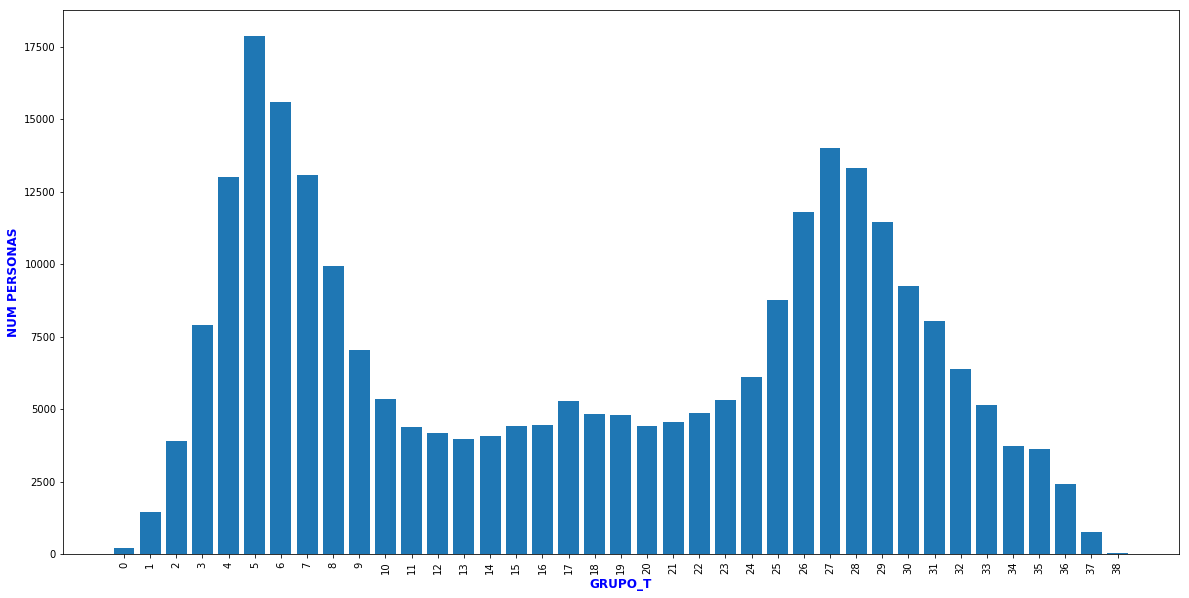

In [19]:
#Esns.distplot(data_01_iBloques['TARJETA']['count'])

plt.figure(figsize=(20,10))
plt.bar(np.arange(len(bloques_tiempo)-1),data_01_iBloques['TARJETA']['count'])
plt.xticks(np.arange(len(bloques_tiempo)-1),list(range(len(bloques_tiempo)-1)),rotation=90)
#plt.xticks(np.arange(len(bloques_tiempo)-1),data_01_iBloques['TIEMPO_CORTE'],rotation=90)

print(len(data_01_iBloques['TIEMPO_CORTE']))
print(len(bloques_tiempo)-1)

#names_ylabel = [""+bloques_tiempo[i]+"->"+dt.strftime(data_01_iBloques['TIEMPO_CORTE'][i]+"" for i in range(len(bloques_tiempo)-1)]
#names_ylabel = pd.DataFrame(np.linspace(0,len(bloques_tiempo)-1,1),len(bloques_tiempo)-1).map(str) + data_01_iBloques['TIEMPO_CORTE']
#names_ylabel = [i for i in range(len(bloques_tiempo)-1)].map(str)+ data_01_iBloques['TIEMPO_CORTE']

#plt.xticks(np.arange(len(bloques_tiempo)-1),names_ylabel,rotation=90)
plt.xlabel('GRUPO_T', fontweight='bold', color = 'blue', fontsize='12')
plt.ylabel('NUM PERSONAS', fontweight='bold', color = 'blue', fontsize='12')
plt.show()


## Cortando el dataframe en grupos de tiempo

In [34]:
# display(data_01[data_01['GRUPO_T']==1])

#definiendo el grupo a teabajar

grupo=5


data_01_grupo=data_01[data_01['GRUPO_T']==grupo]

data_01_grupo.reset_index(drop=True,inplace=True)

print("Se trabajaran con ->",len(data_01_grupo),"<- datos")

#display(data_01_grupo[:50])
#display(data_01_grupo.head(),"....",data_01_grupo.tail())

Se trabajaran con -> 17860 <- datos


## Creando la matriz de frencuencias

In [35]:
#print(paraderos)
dim=len(paraderos)
print("cantidad de paraderos: ",dim)
tabla_g01 = pd.DataFrame(np.reshape(np.zeros(dim*dim,dtype=int),(dim,dim)))
paraderos_sort=list(['Naranjal',
                'Izaguirre',
                'Pacifico',
                'Independencia',
                'Los jazmines',
                'Tomas Valle',
                'El Milagro',
                'Honorio Delgado',
                'Uni',
                'Parque del Trabajo',
                'Caqueta',
                '2 de Mayo',
                'Quilca',
                'España',
                'Estacion Central',
                'Estadio Nacional',
                'México',
                'Canadá',
                'Javier Prado',
                'Canaval y Moreyra',
                'Aramburu',
                'Domingo Orué',
                'Angamos',
                'Ricardo Palma',
                'Benavides',
                '28 de Julio',
                'Plaza de Flores',
                'Balta',
                'Bulevar',
                'Union',
                'Escuela Militar',
                'Terán',
                'Rosario de Villa',
                'Matellini'
          ])

print(paraderos)
tabla_g01.index=paraderos_sort
tabla_g01.columns=paraderos_sort

#display(tabla_g01)
print("cantidad de datos de data_01_grupo:",len(data_01_grupo))
#print(data_01_grupo['PARADA'])

cantidad de paraderos:  34
['Ricardo Palma', 'Matellini', 'Balta', 'Parque del Trabajo', 'Aramburu', 'Union', 'México', 'Javier Prado', 'Terán', 'Izaguirre', 'Uni', 'Canaval y Moreyra', 'Plaza de Flores', 'Rosario de Villa', '2 de Mayo', 'Escuela Militar', 'Estadio Nacional', 'Estacion Central', 'Angamos', 'El Milagro', 'Independencia', 'Caqueta', 'Benavides', 'Los jazmines', 'Pacifico', '28 de Julio', 'España', 'Bulevar', 'Naranjal', 'Quilca', 'Tomas Valle', 'Canadá', 'Honorio Delgado', 'Domingo Orué']
cantidad de datos de data_01_grupo: 17860


In [36]:
display(data_01_grupo.head())

,HORAS_FORMATO,TARJETA,PARADA,PARADA_F,GRUPO_T
0,06:59:01,1117882761,Balta,Estacion Central,5
1,06:59:01,3975118227,España,Matellini,5
2,06:59:01,977406397,Independencia,Angamos,5
3,06:59:01,250823401,Independencia,Matellini,5
4,06:59:01,3914951315,Matellini,Estacion Central,5


In [38]:
i=''
j=''
#display(data_01_grupo[:10])
#print(tabla_g01['2 de Mayo']['Matellini'])
for e in range(len(data_01_grupo)):
    #print("Index ",e,"-> i:",i,"----> j:",j)
    i = data_01_grupo['PARADA'][e]
    j = data_01_grupo['PARADA_F'][e]
    
    tabla_g01[i][j]=tabla_g01[i][j]+1

In [46]:
display(tabla_g01)
tabla_g01_inverse = tabla_g01.T

,Naranjal,Izaguirre,Pacifico,Independencia,Los jazmines,Tomas Valle,El Milagro,Honorio Delgado,Uni,Parque del Trabajo,...,Benavides,28 de Julio,Plaza de Flores,Balta,Bulevar,Union,Escuela Militar,Terán,Rosario de Villa,Matellini
Naranjal,0,0,0,2,2,6,0,2,2,6,...,72,28,80,12,12,2,0,18,26,134
Izaguirre,8,0,0,0,0,0,0,0,0,0,...,16,8,30,2,2,2,2,4,2,28
Pacifico,0,0,0,0,0,0,0,0,0,0,...,4,2,4,0,0,0,0,0,0,4
Independencia,0,2,0,0,0,0,0,0,0,0,...,8,0,10,0,0,2,0,0,0,28
Los jazmines,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
Tomas Valle,6,0,0,0,2,0,0,0,0,0,...,16,6,40,2,4,2,2,2,8,70
El Milagro,0,0,0,0,0,0,0,0,0,0,...,0,0,4,0,0,2,2,0,2,10
Honorio Delgado,38,2,0,0,0,2,0,0,0,0,...,12,2,18,0,2,8,0,6,0,30
Uni,126,2,6,0,0,0,0,0,0,0,...,14,4,42,4,10,2,2,6,4,102
Parque del Trabajo,28,6,0,0,0,2,0,0,0,0,...,6,0,4,0,0,0,0,0,12,24


In [76]:
tabla_g01_inverse['Naranjal'].values[:]

array([  0,   0,   0,   2,   2,   6,   0,   2,   2,   6,  12,  20,  10,
        56,  70,  12,  40,  78,  78, 126,  32,  12, 160,  44,  72,  28,
        80,  12,  12,   2,   0,  18,  26, 134])

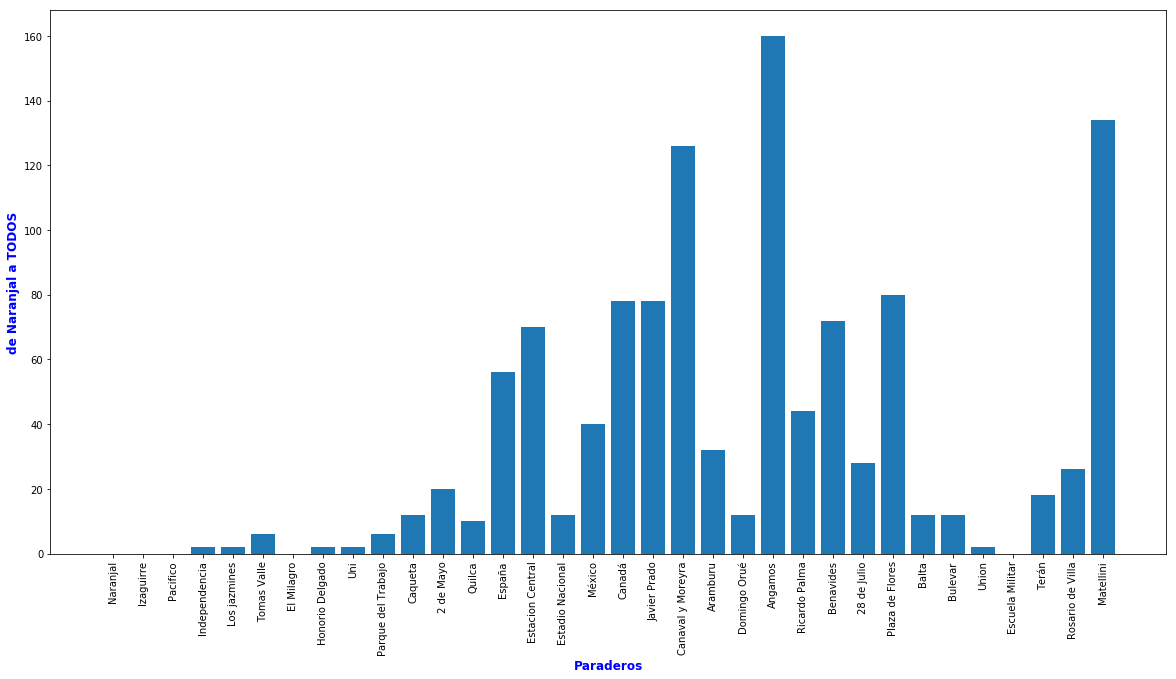

In [77]:

plt.figure(figsize=(20,10))
plt.bar(np.arange(len(paraderos_sort)),tabla_g01_inverse['Naranjal'].values[:])
plt.xticks(np.arange(len(paraderos_sort)),paraderos_sort,rotation=90)
#plt.xticks(np.arange(len(bloques_tiempo)-1),data_01_iBloques['TIEMPO_CORTE'],rotation=90)

#print(len(data_01_iBloques['TIEMPO_CORTE']))
#print(len(bloques_tiempo)-1)

#names_ylabel = [""+bloques_tiempo[i]+"->"+dt.strftime(data_01_iBloques['TIEMPO_CORTE'][i]+"" for i in range(len(bloques_tiempo)-1)]
#names_ylabel = pd.DataFrame(np.linspace(0,len(bloques_tiempo)-1,1),len(bloques_tiempo)-1).map(str) + data_01_iBloques['TIEMPO_CORTE']
#names_ylabel = [i for i in range(len(bloques_tiempo)-1)].map(str)+ data_01_iBloques['TIEMPO_CORTE']

#plt.xticks(np.arange(len(bloques_tiempo)-1),names_ylabel,rotation=90)
plt.xlabel('Paraderos', fontweight='bold', color = 'blue', fontsize='12')
plt.ylabel('de Naranjal a TODOS', fontweight='bold', color = 'blue', fontsize='12')
plt.show()


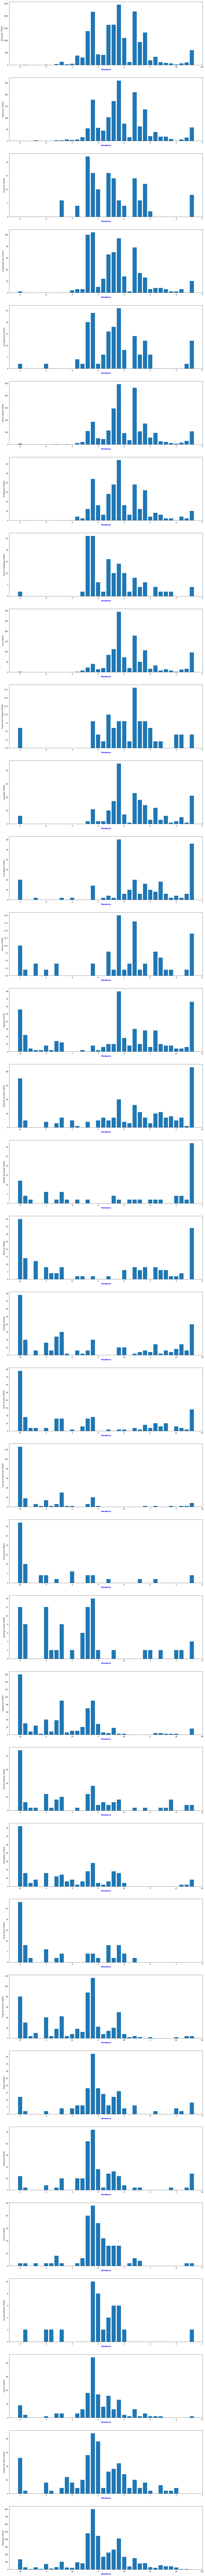

In [111]:
fig, axes = plt.subplots(len(paraderos_sort), 1, figsize=(20,8*len(paraderos_sort)))

for i in range(len(paraderos_sort)):
    #plt.subplot(len(paraderos_sort)+1, 1, i+1)
    axes[i].bar(np.arange(len(paraderos_sort)),list(tabla_g01_inverse[paraderos_sort[i]].values[:])
    #plt.xticks(np.arange(len(paraderos_sort)),paraderos_sort,rotation=90)
    #plt.xlabel('Paraderos', fontweight='bold', color = 'blue', fontsize='12')
    axes[i].set_ylabel(""+paraderos_sort[i]+"a TODOS")
    #axes[i].set_xticks(np.arange(len(paraderos_sort)),paraderos_sort)
    axes[i].set_xticklabels(list(tabla_g01_inverse[paraderos_sort[i]].values[:]))
    axes[i].set_xlabel('Paraderos', fontweight='bold', color = 'blue')
    #axes[i].xlabel('Paraderos', fontweight='bold', color = 'blue', fontsize='12')
    #axes[i].ylabel(""+paraderos_sort[i]+"a TODOS", fontweight='bold', color = 'blue', fontsize='12')
#plt.show()

In [101]:
print(list(tabla_g01_inverse[paraderos_sort[i]].values[:]))

[600, 58, 8, 20, 12, 106, 10, 4, 96, 4, 42, 56, 14, 66, 86, 32, 34, 40, 28, 8, 4, 4, 16, 4, 8, 0, 4, 8, 14, 2, 2, 2, 0, 0]


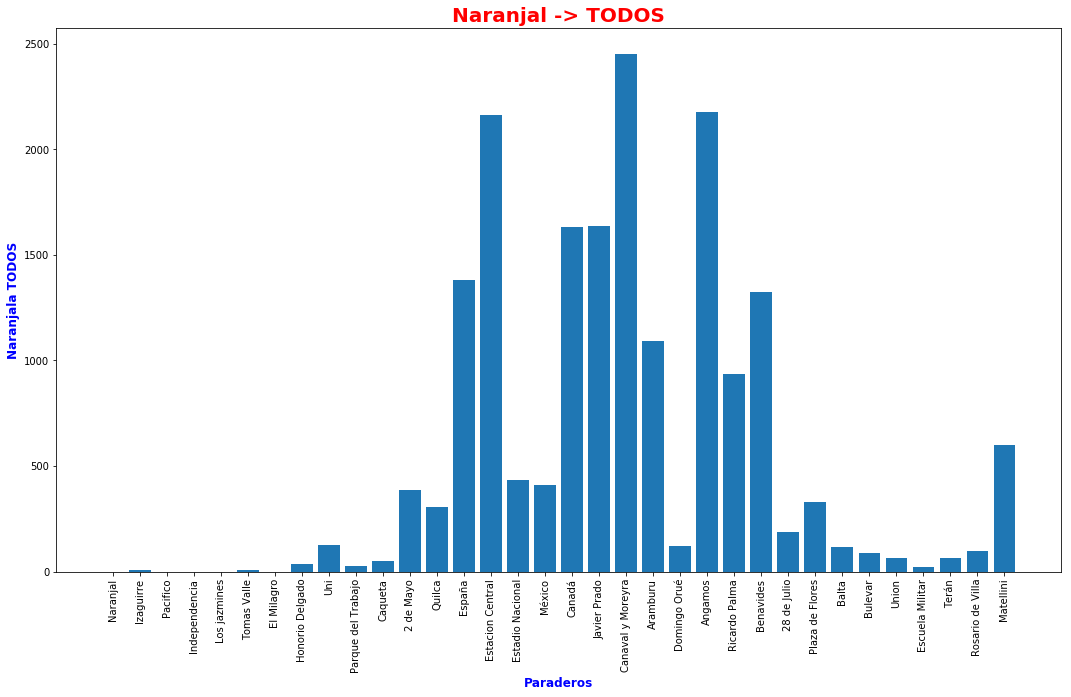

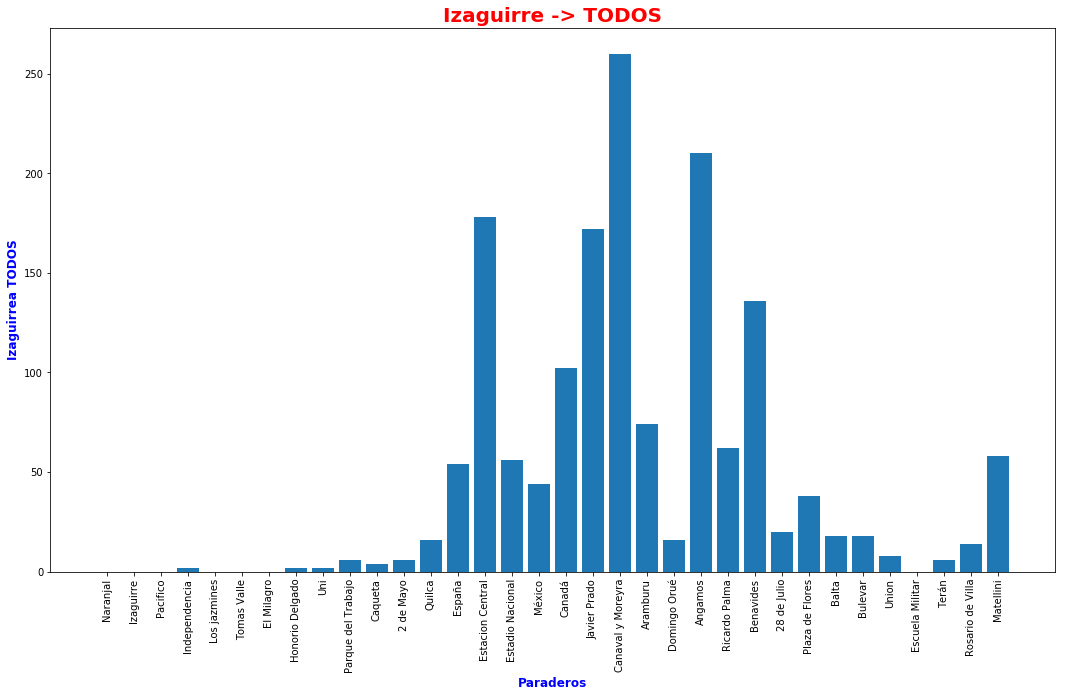

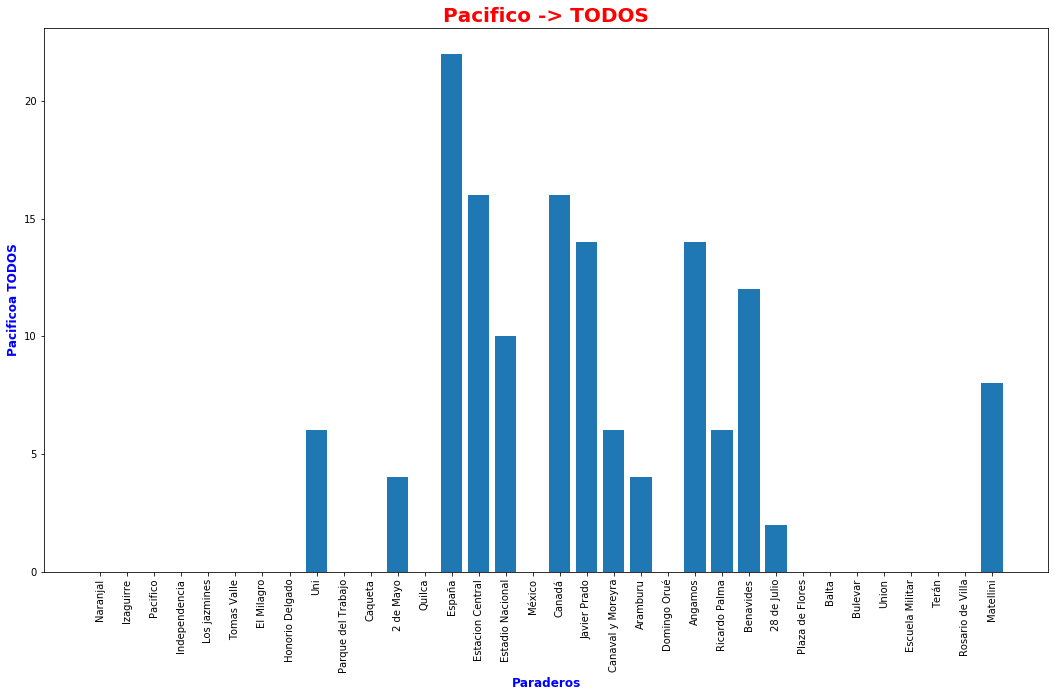

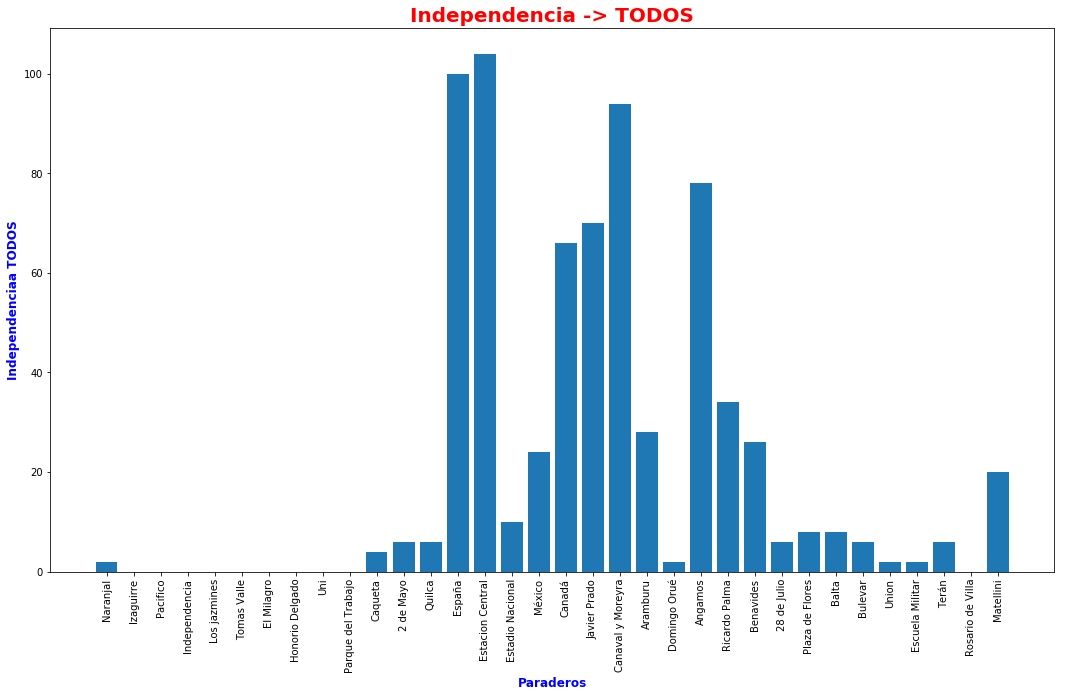

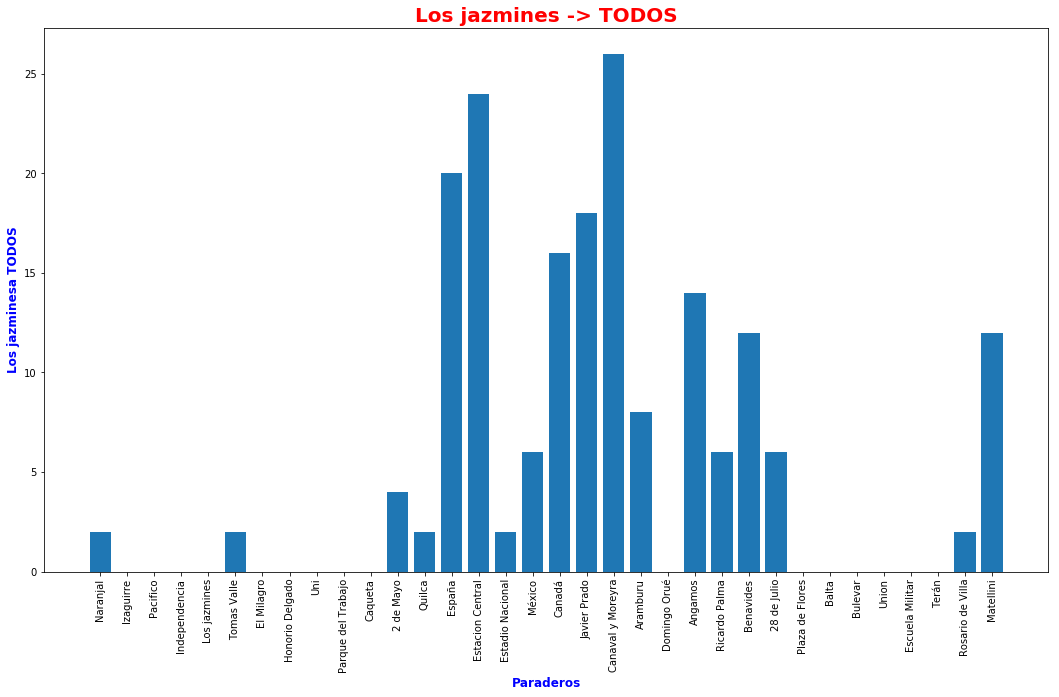

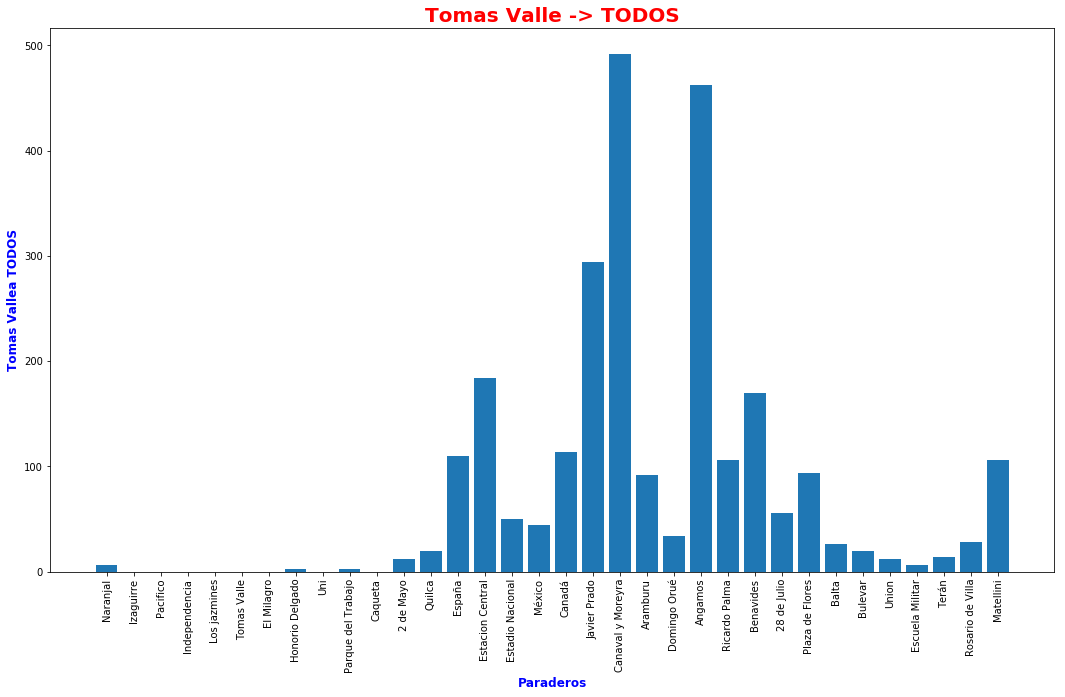

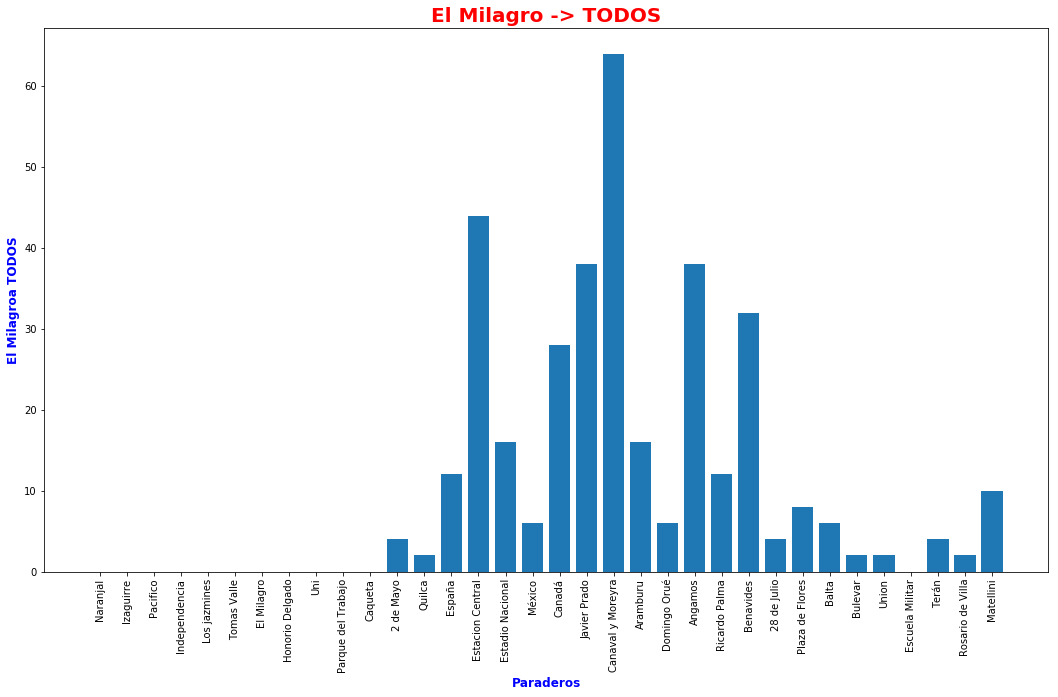

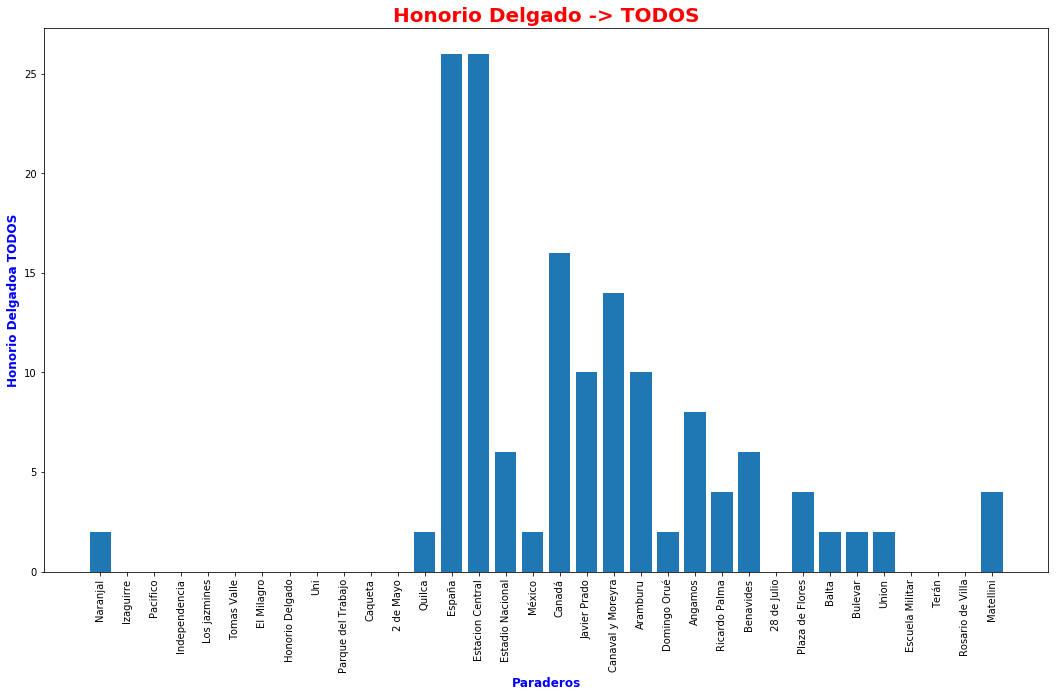

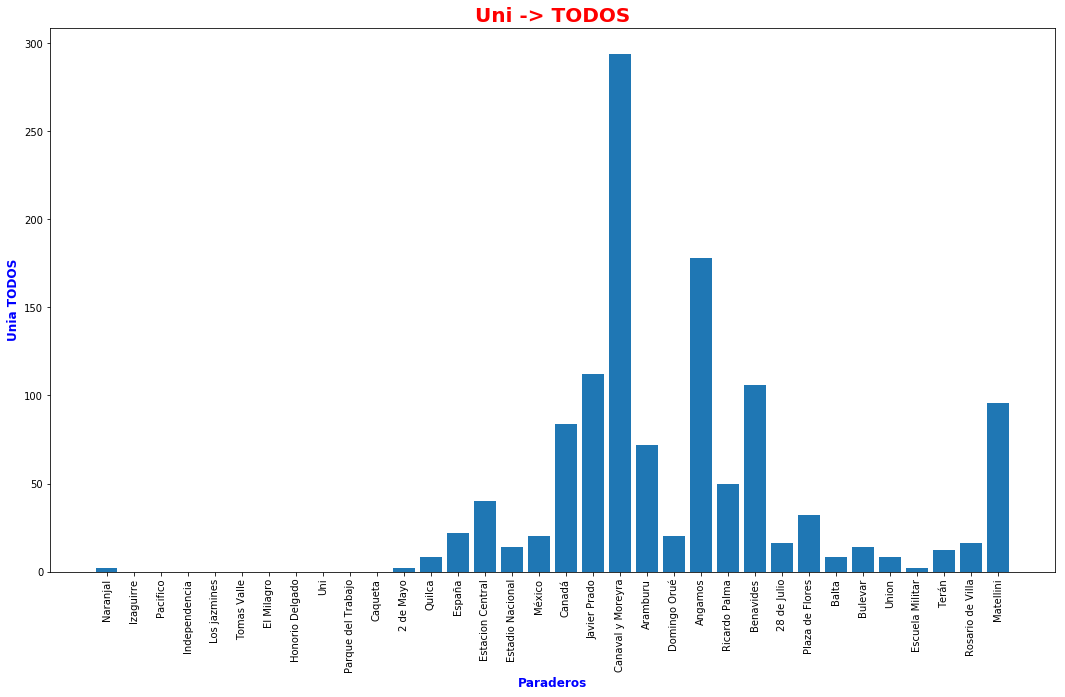

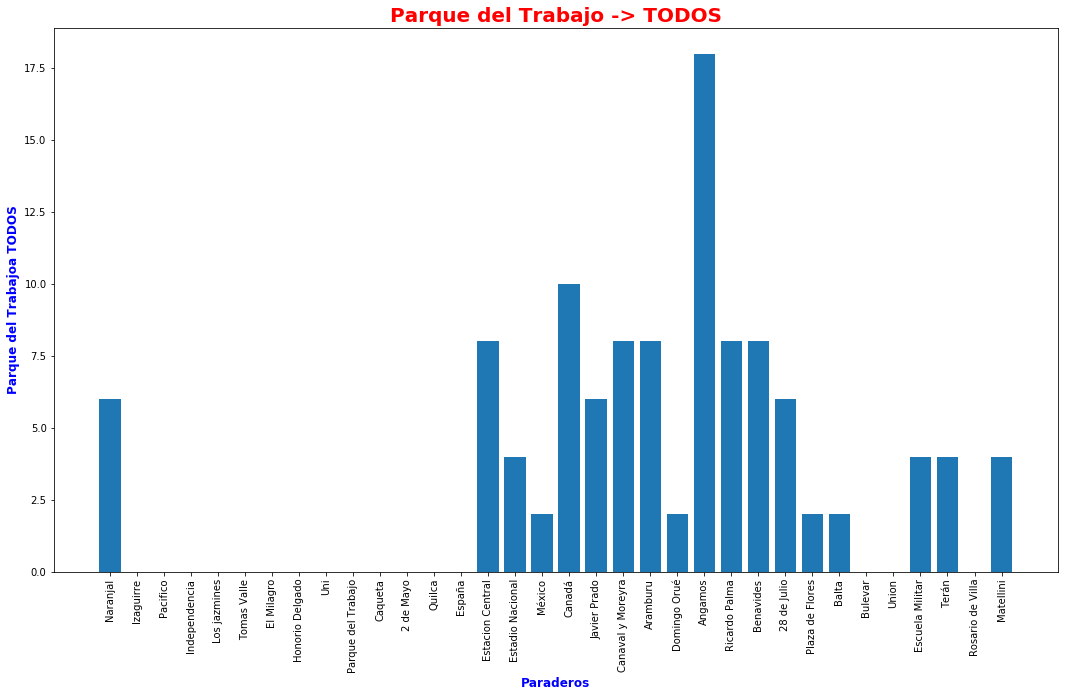

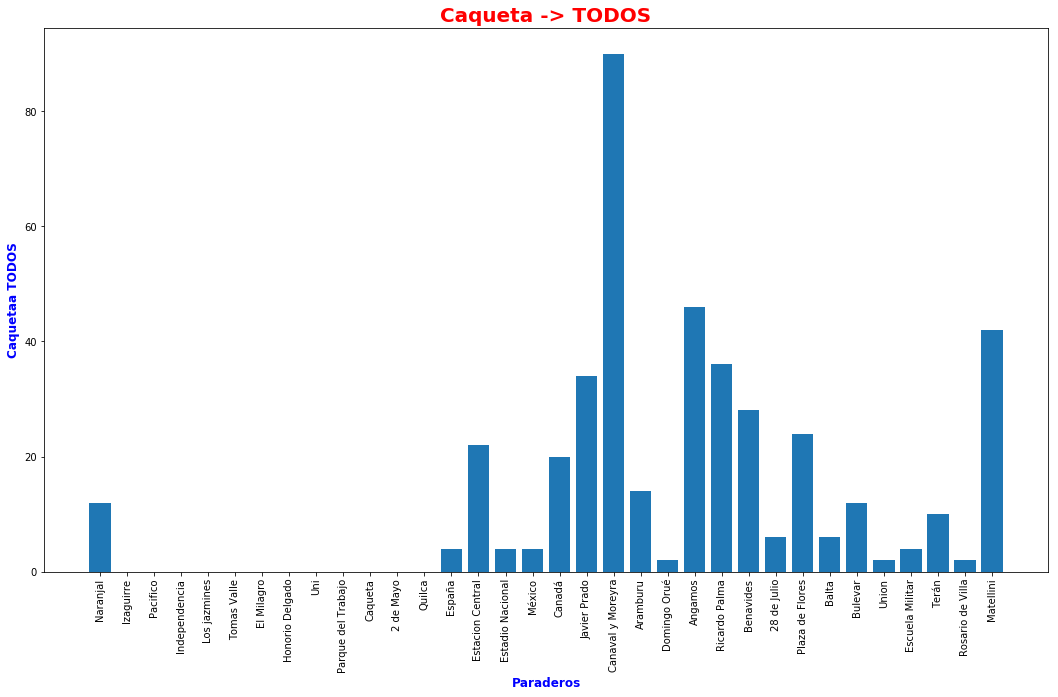

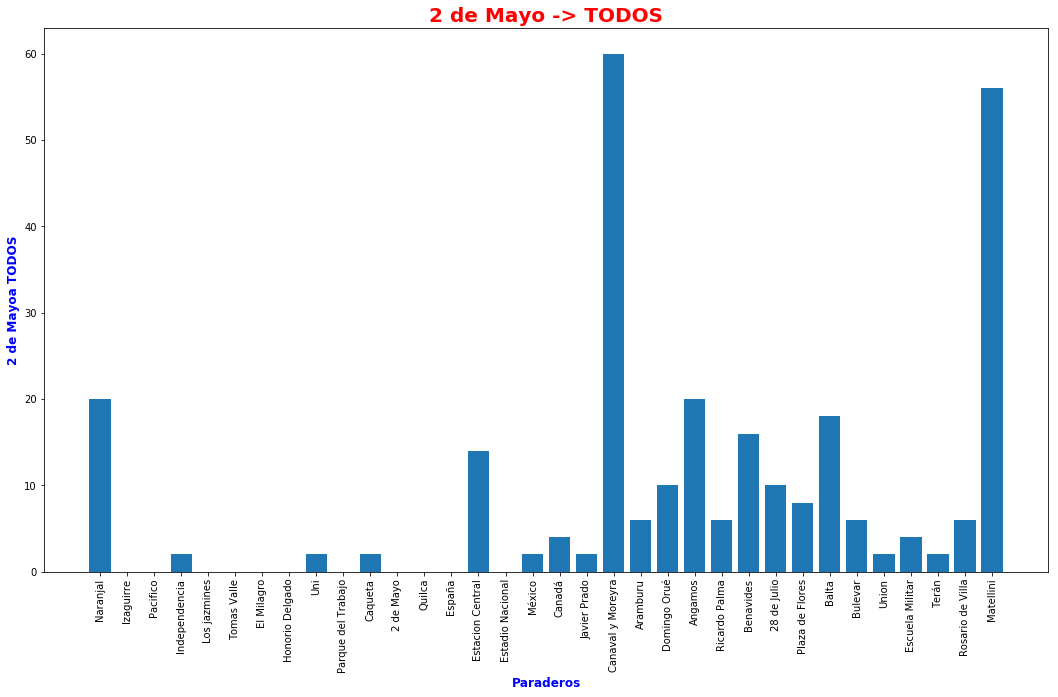

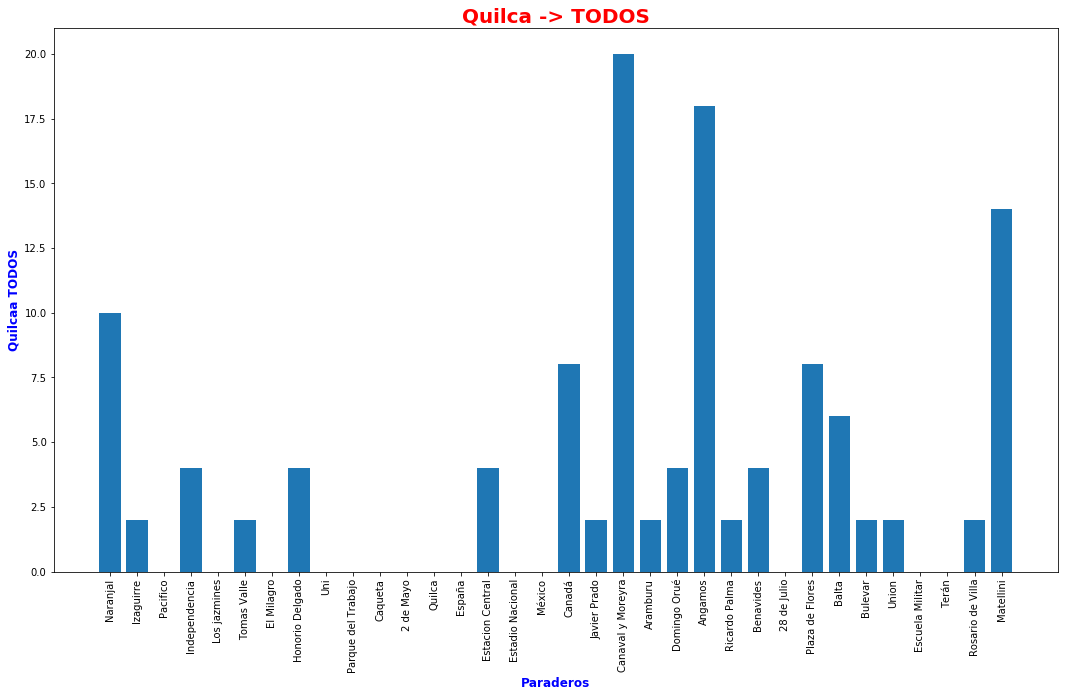

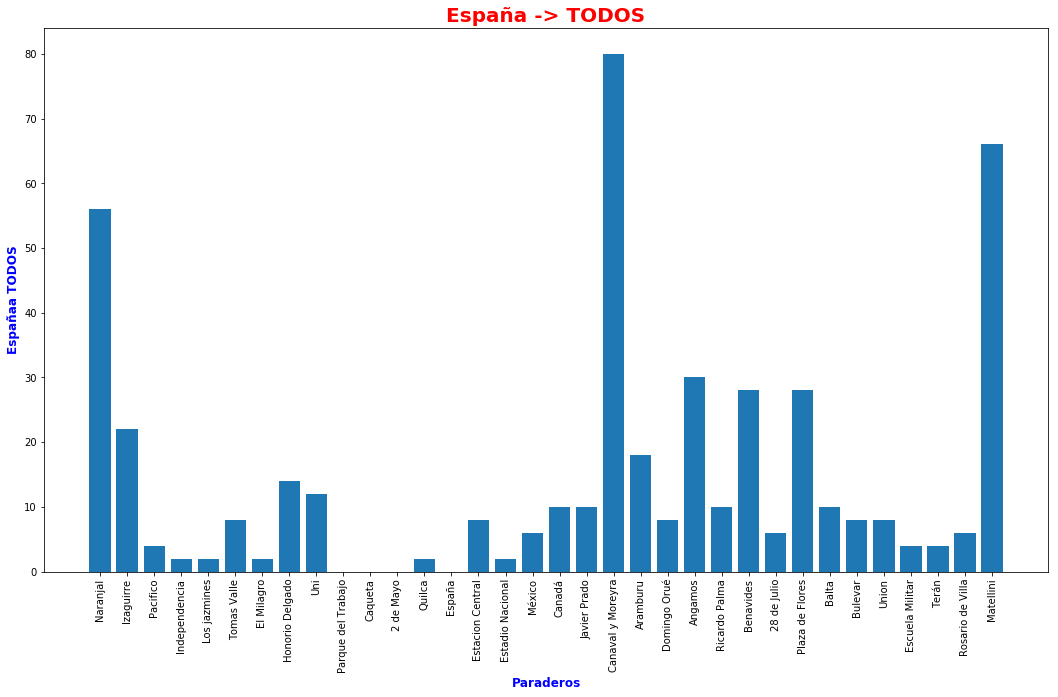

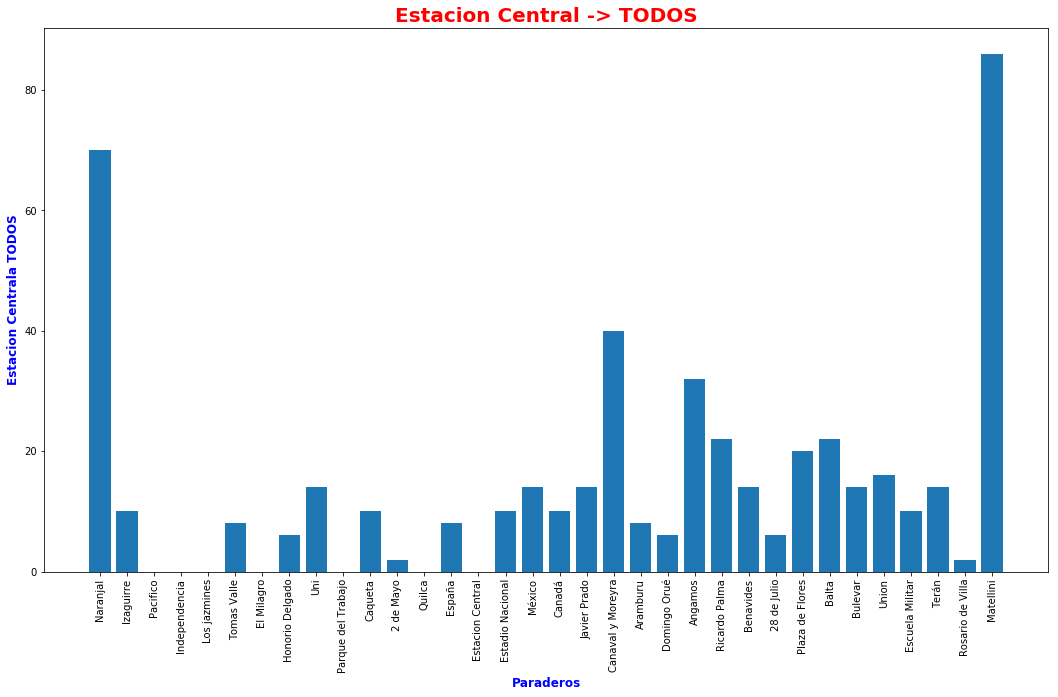

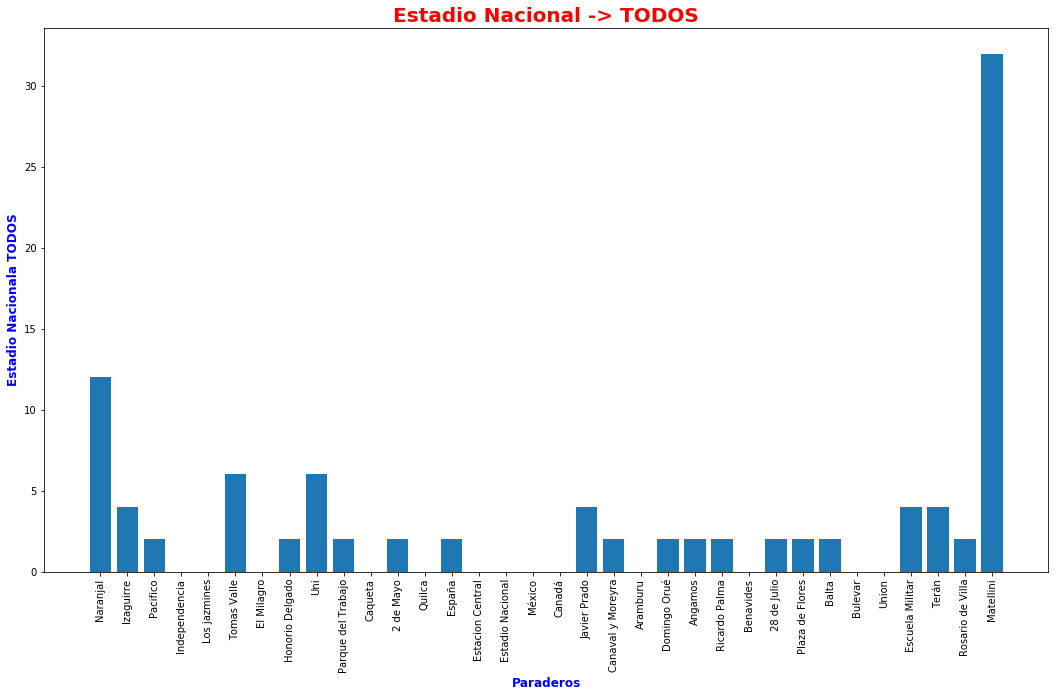

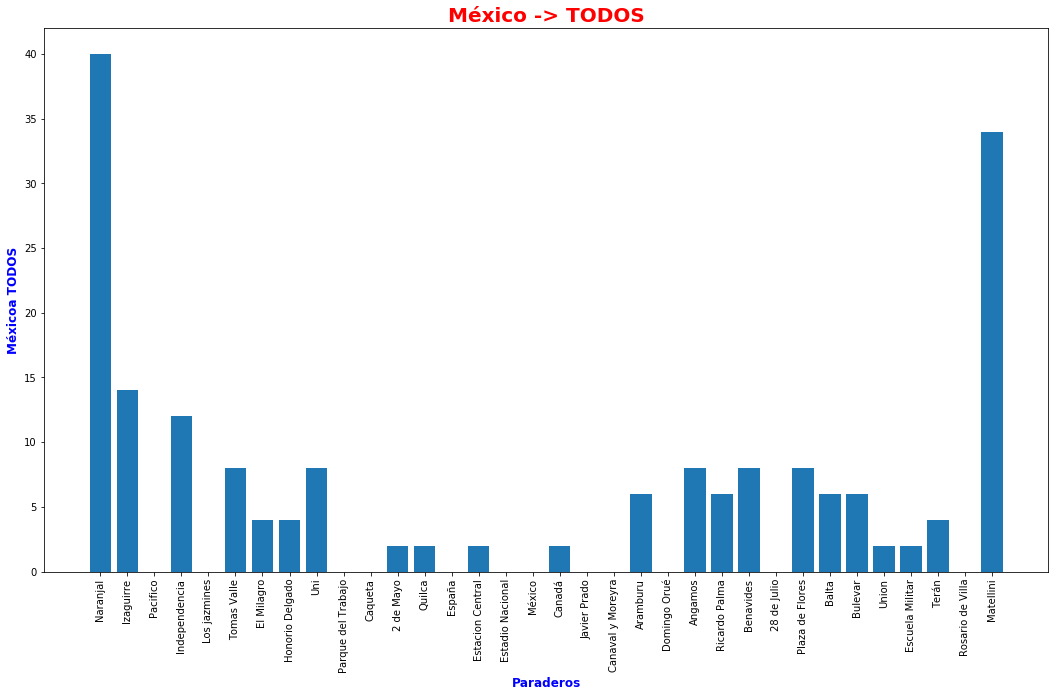

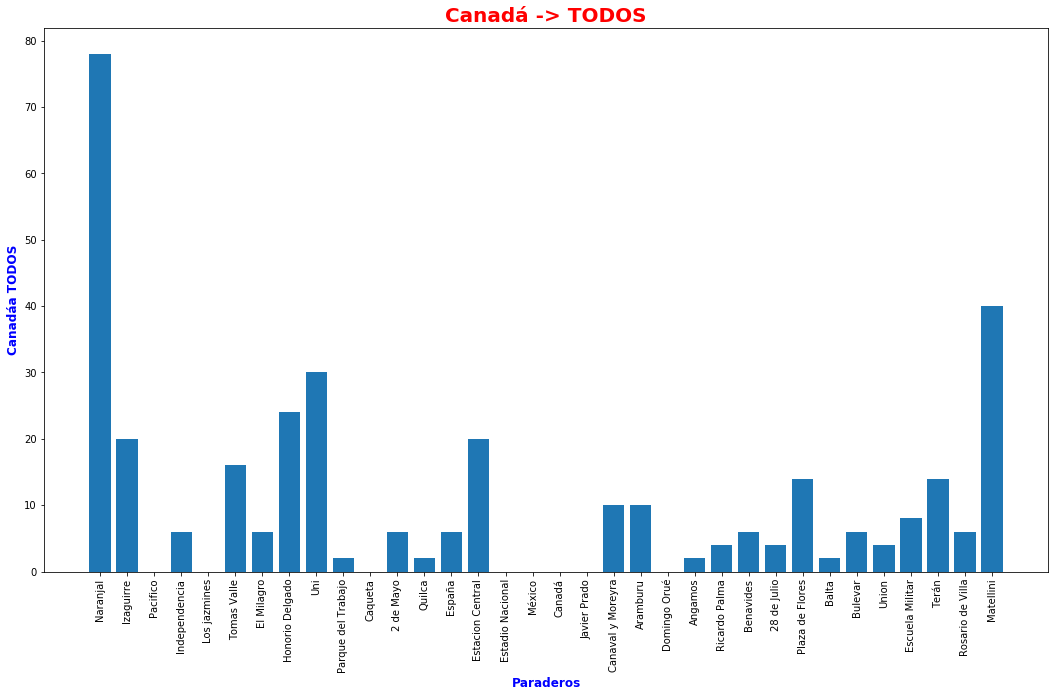

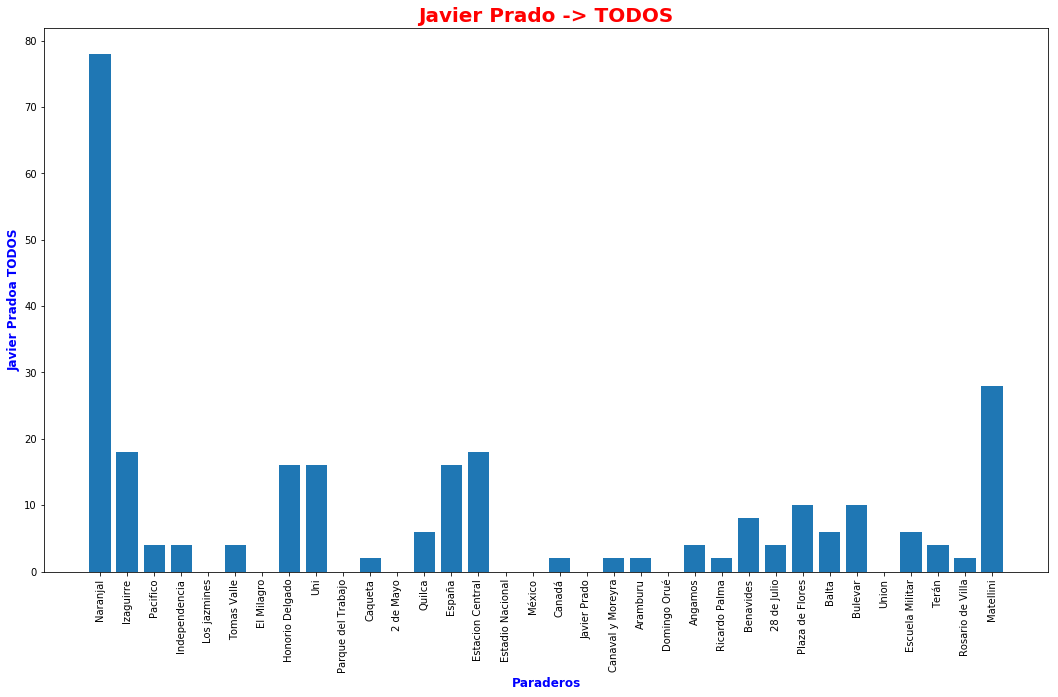

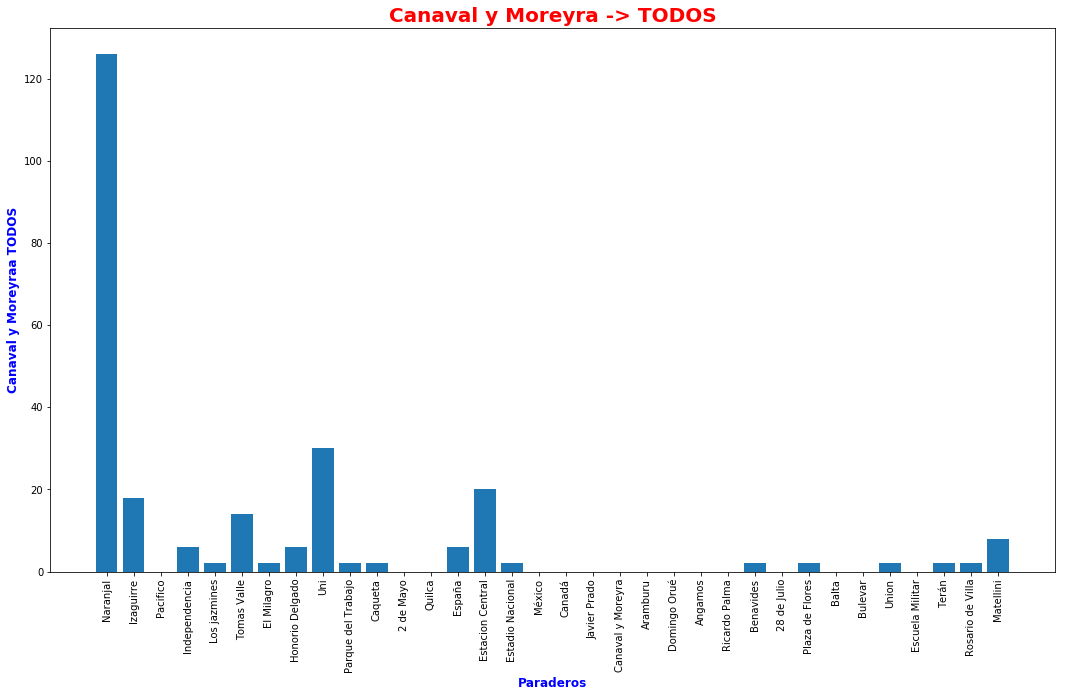

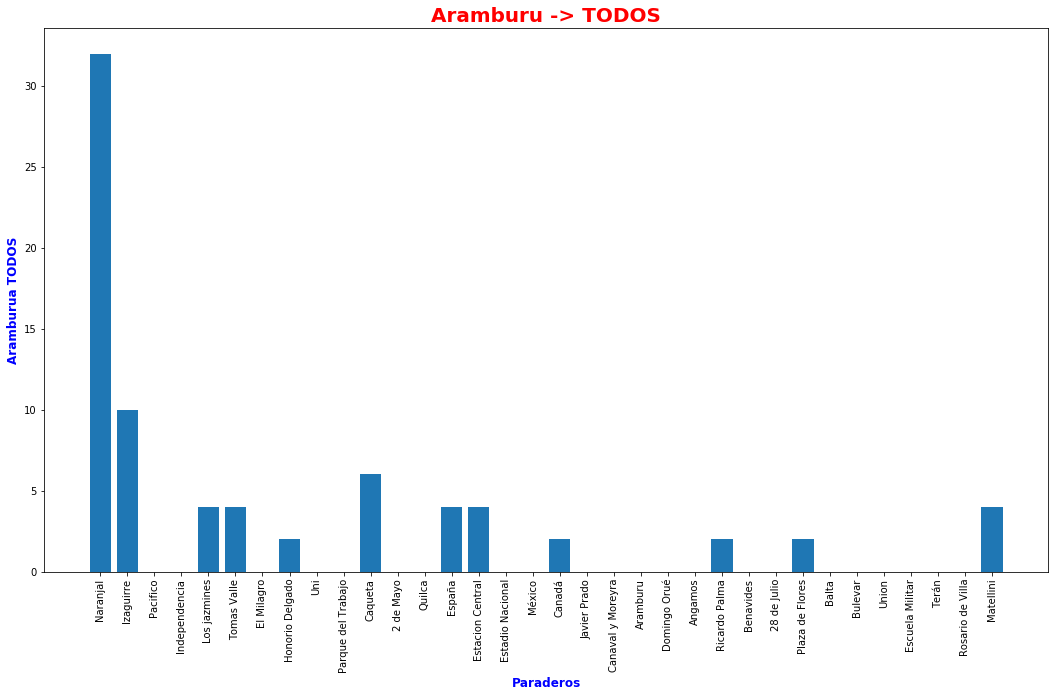

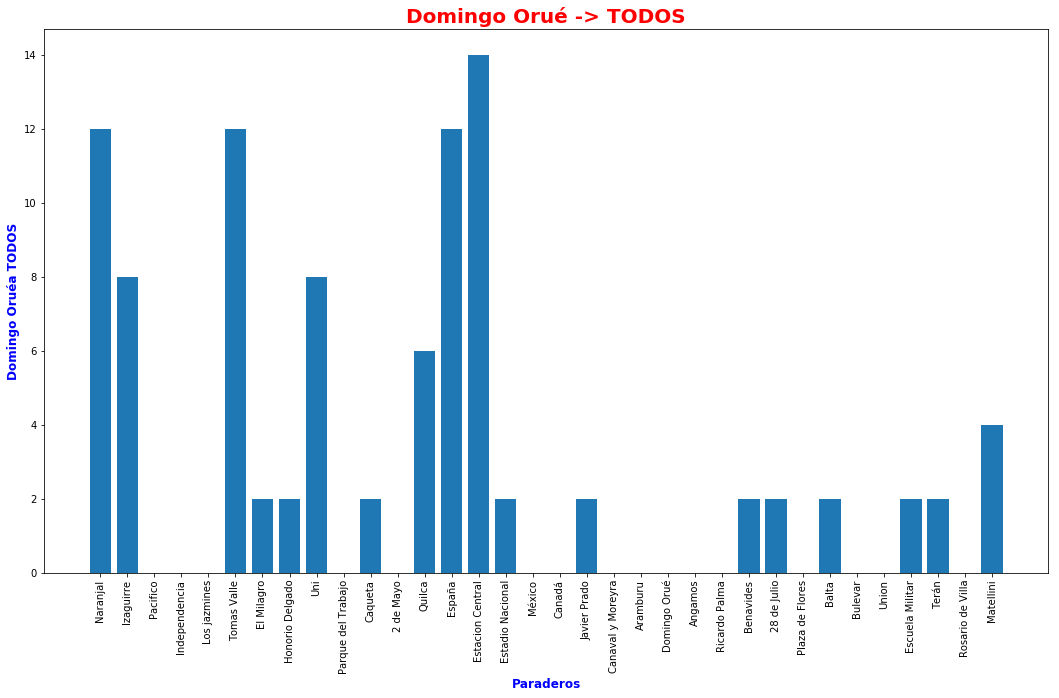

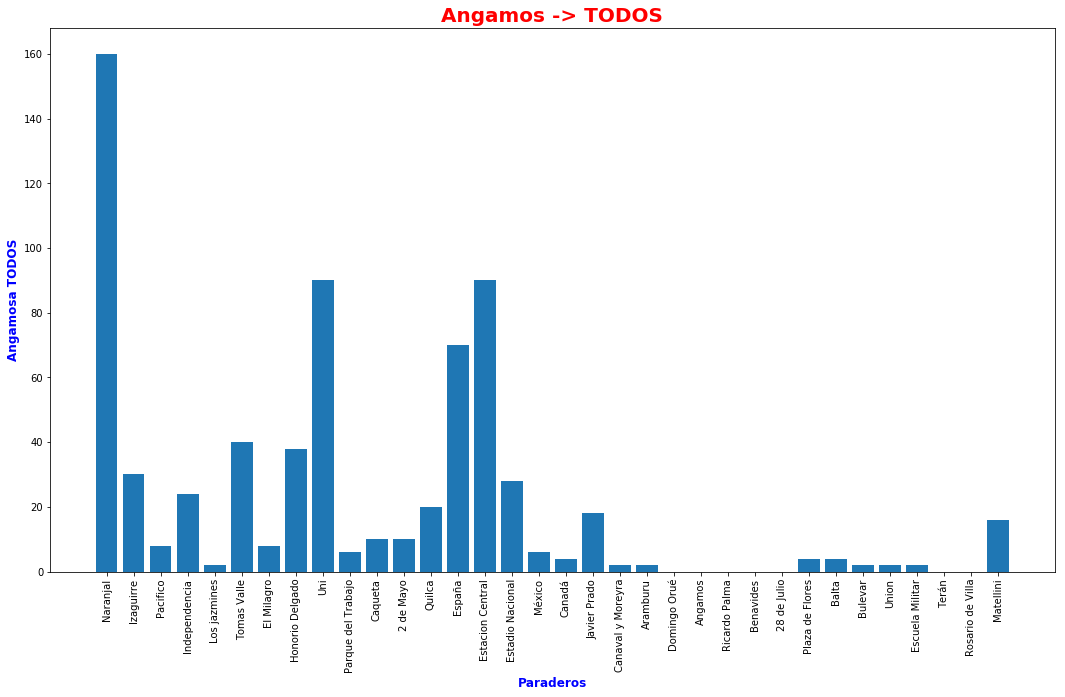

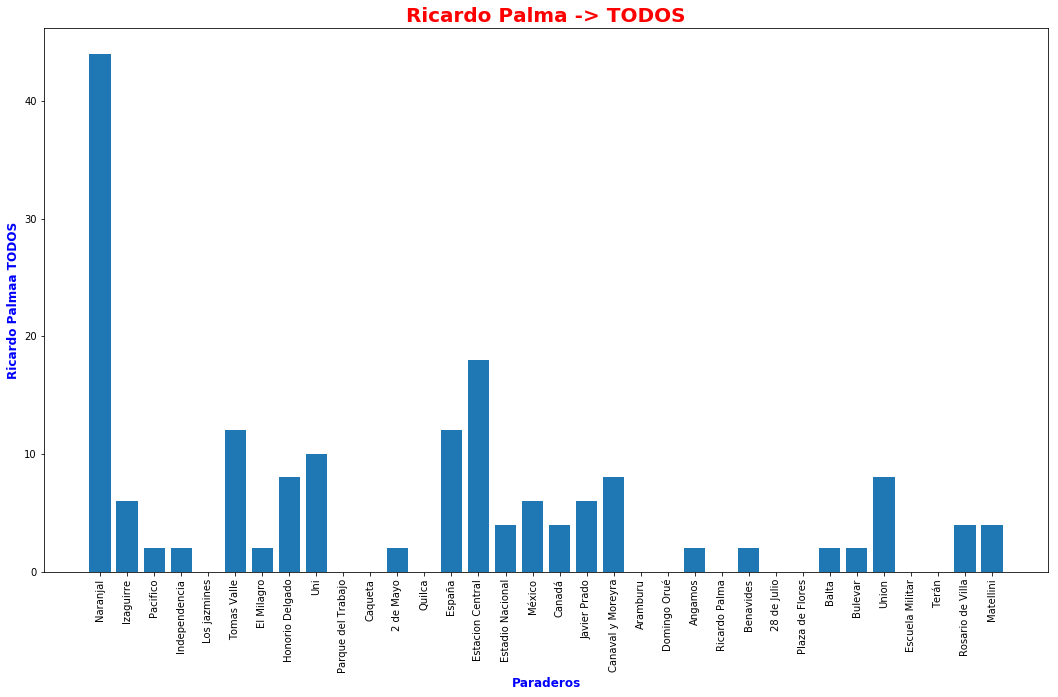

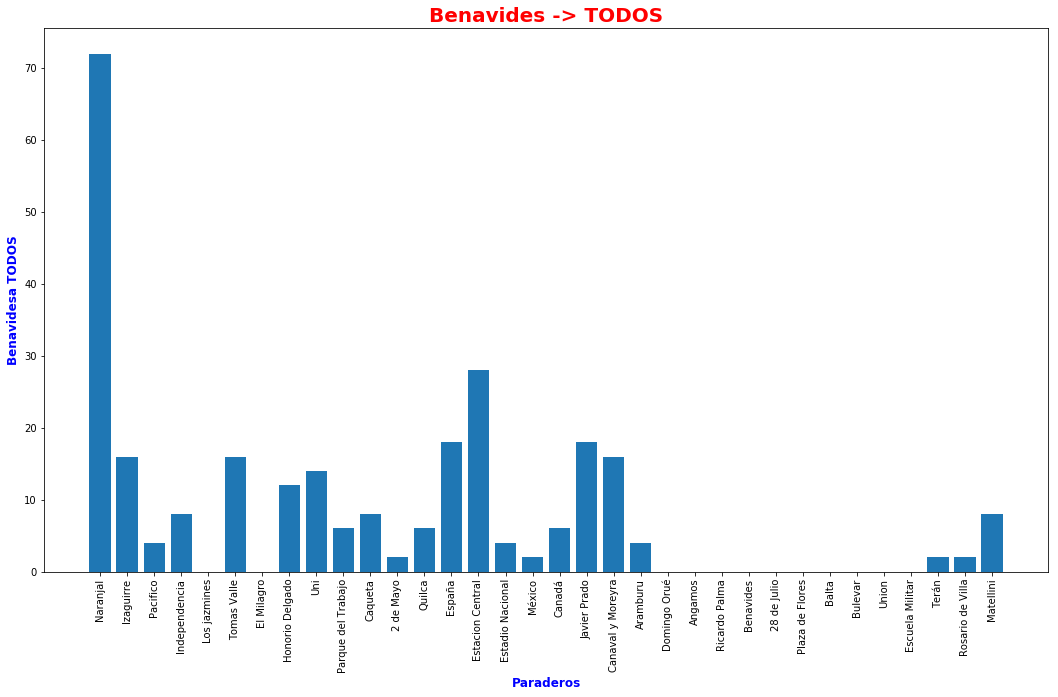

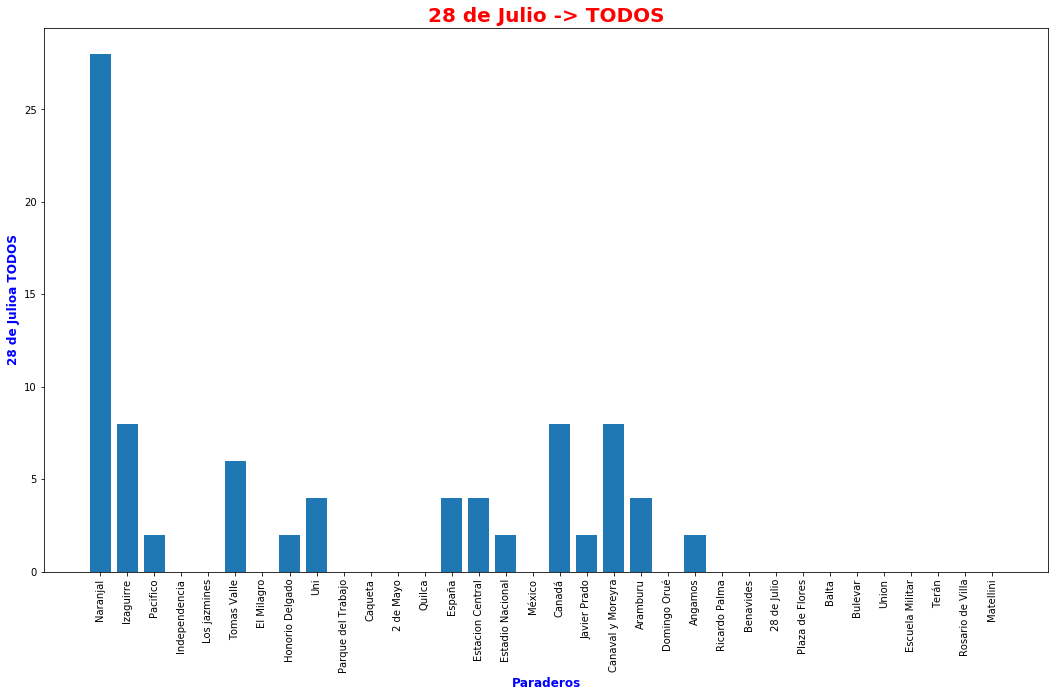

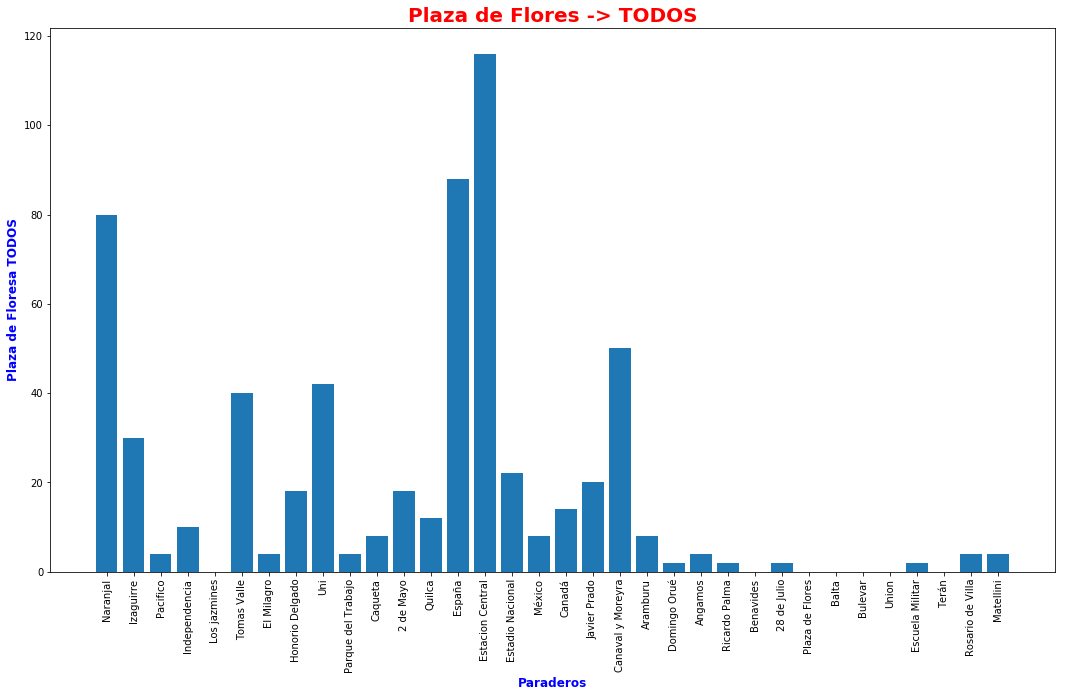

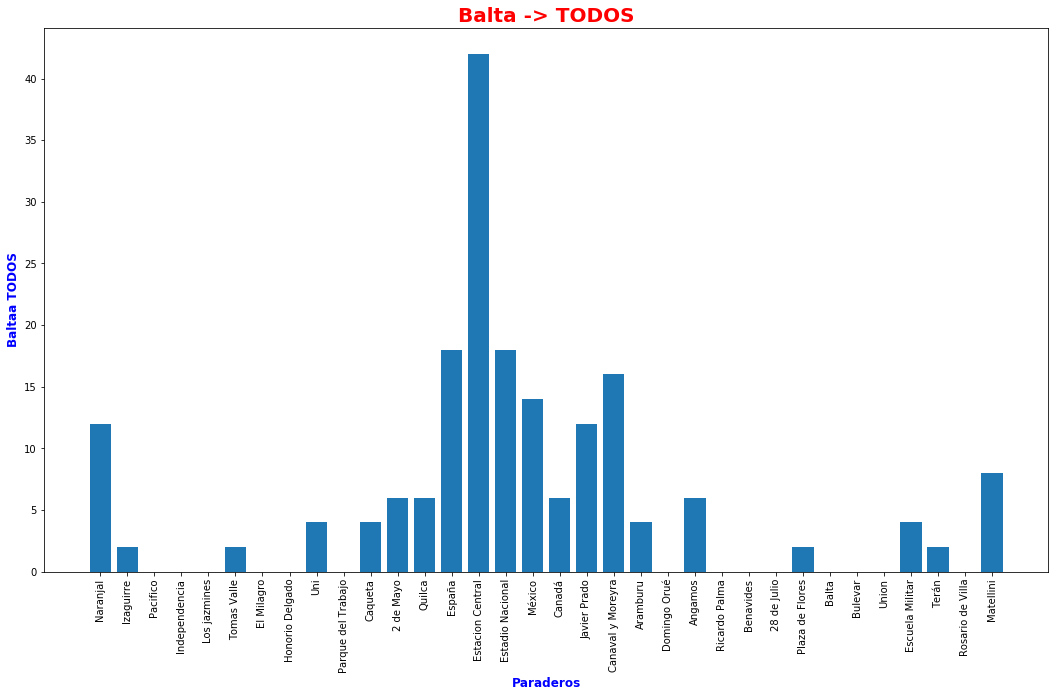

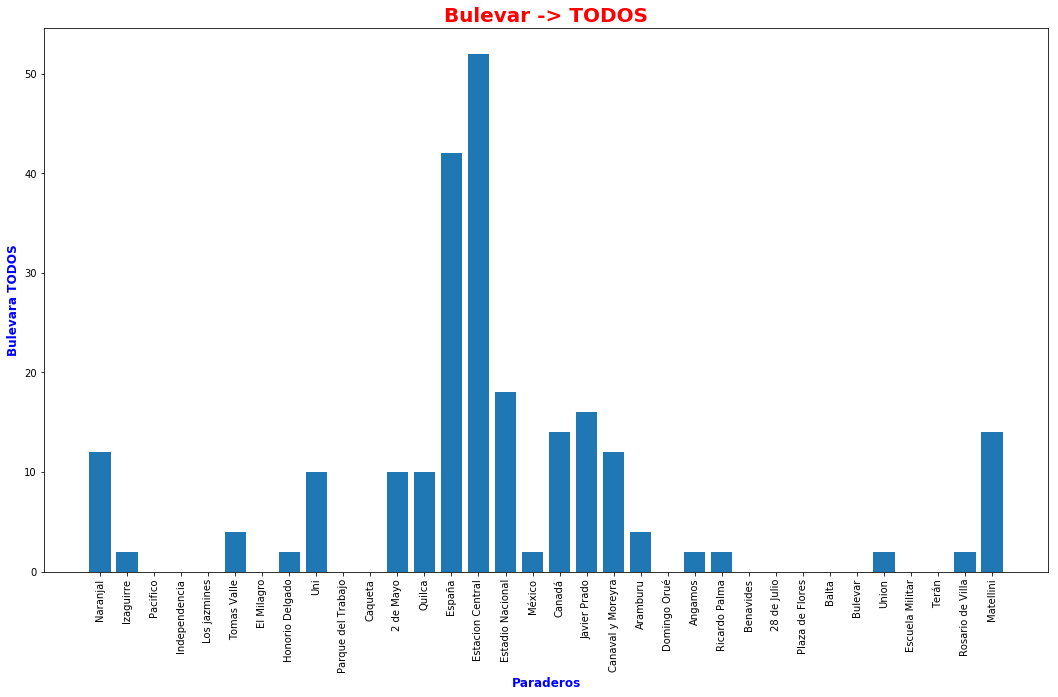

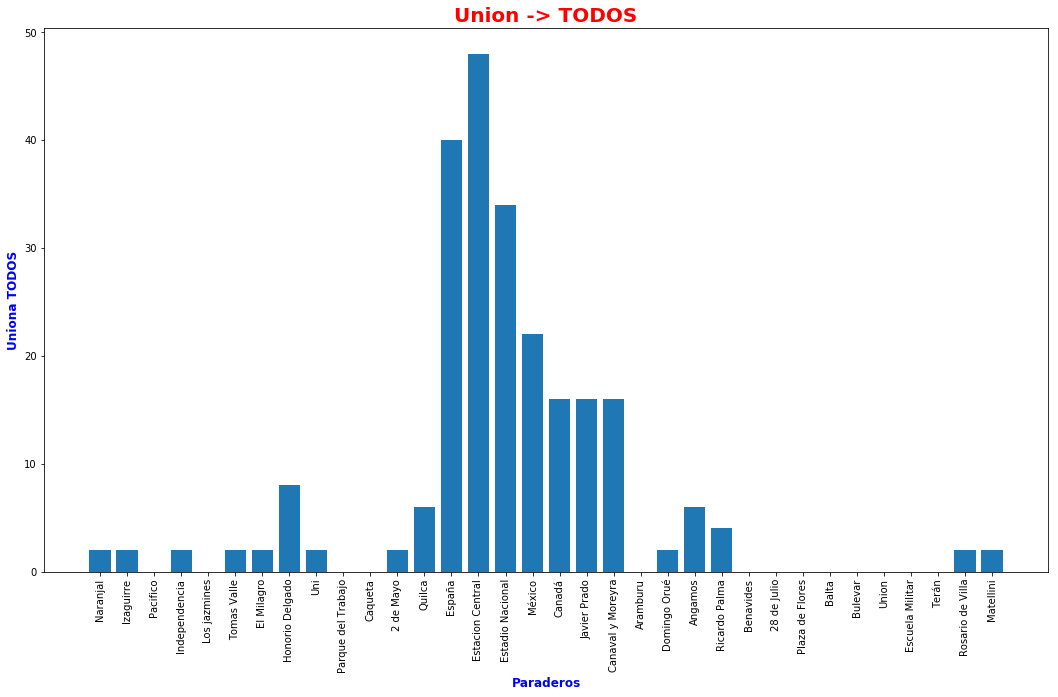

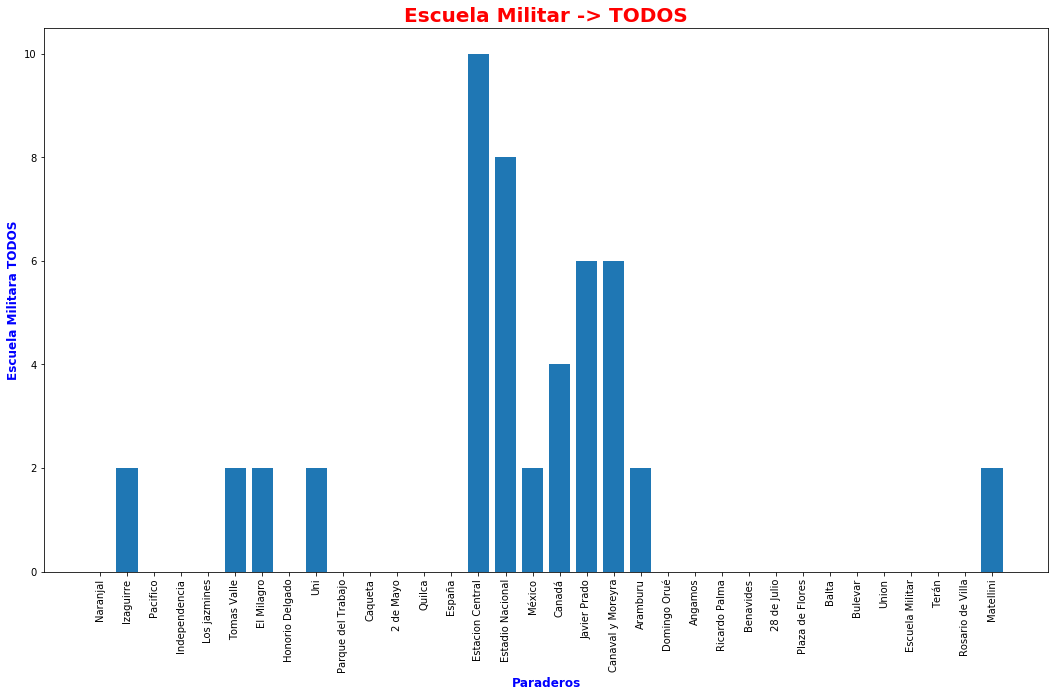

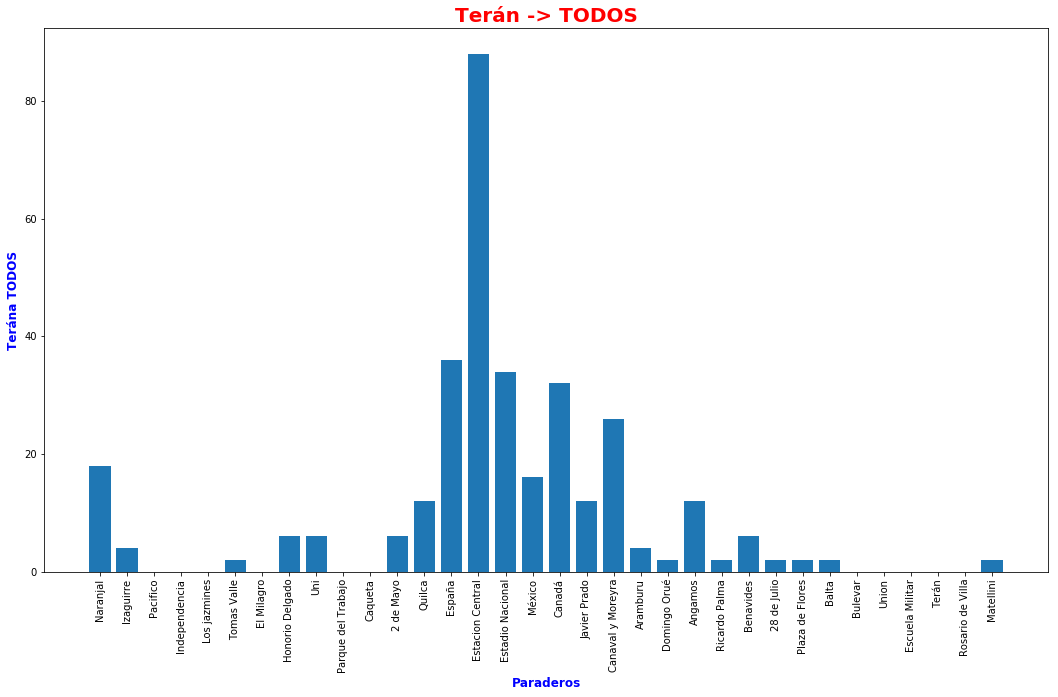

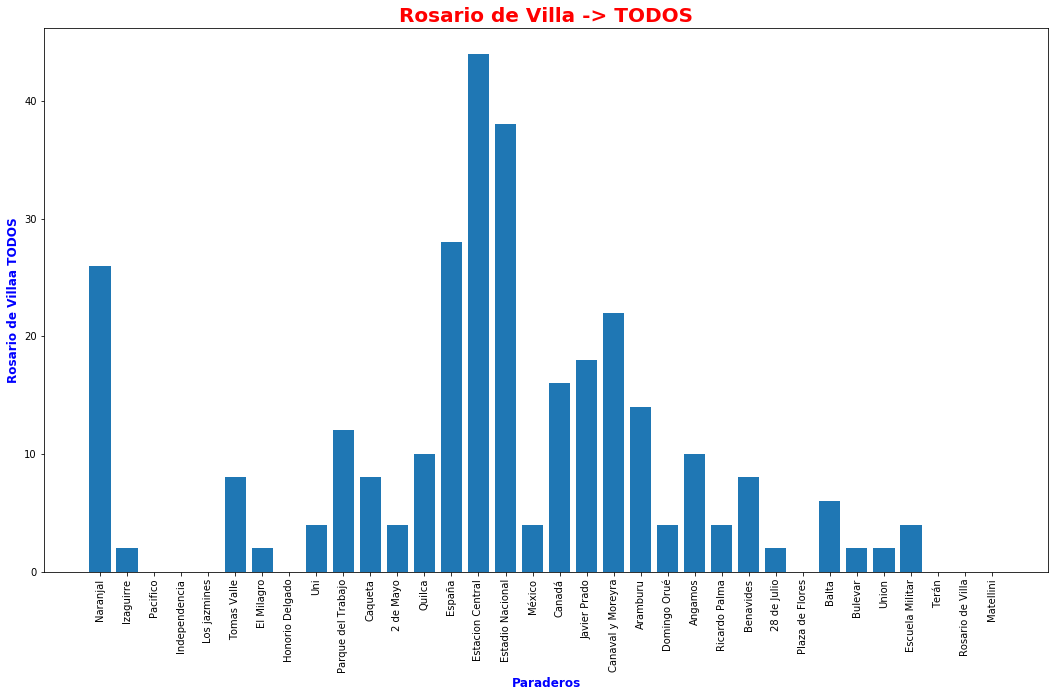

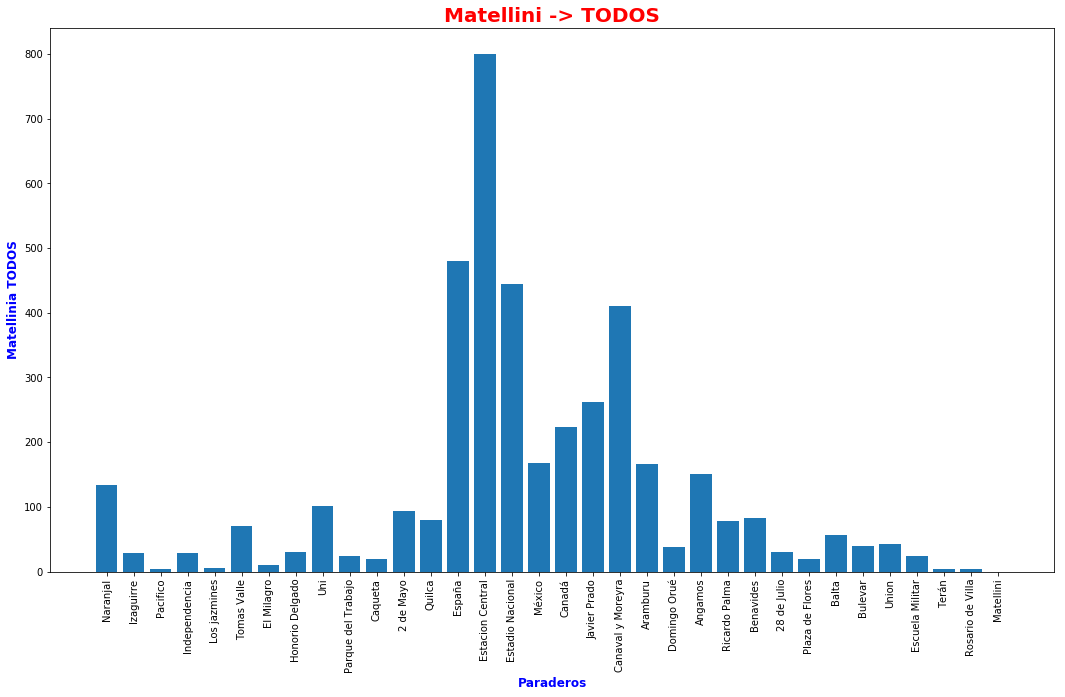

In [112]:
for i in range(len(paraderos_sort)):
    plt.figure(figsize=(18,10))
    plt.bar(np.arange(len(paraderos_sort)),tabla_g01[paraderos_sort[i]].values[:])
    plt.xticks(np.arange(len(paraderos_sort)),paraderos_sort,rotation=90)
    #plt.xticks(np.arange(len(bloques_tiempo)-1),data_01_iBloques['TIEMPO_CORTE'],rotation=90)

    #print(len(data_01_iBloques['TIEMPO_CORTE']))
    #print(len(bloques_tiempo)-1)

    #names_ylabel = [""+bloques_tiempo[i]+"->"+dt.strftime(data_01_iBloques['TIEMPO_CORTE'][i]+"" for i in range(len(bloques_tiempo)-1)]
    #names_ylabel = pd.DataFrame(np.linspace(0,len(bloques_tiempo)-1,1),len(bloques_tiempo)-1).map(str) + data_01_iBloques['TIEMPO_CORTE']
    #names_ylabel = [i for i in range(len(bloques_tiempo)-1)].map(str)+ data_01_iBloques['TIEMPO_CORTE']

    #plt.xticks(np.arange(len(bloques_tiempo)-1),names_ylabel,rotation=90)
    plt.xlabel('Paraderos', fontweight='bold', color = 'blue', fontsize='12')
    plt.ylabel(''+paraderos_sort[i]+ 'a TODOS', fontweight='bold', color = 'blue', fontsize='12')
    plt.title(''+paraderos_sort[i]+' -> TODOS',fontweight='bold', color = 'red', fontsize='20')
    plt.show()


In [114]:
export_excel = tabla_g01.to_excel (r'export_dataframe.xlsx', index = paraderos_sort, header=True) #Don't forget to add '.xlsx' at the end of the path